# Covid Country Analysis

In [1]:
library(ggplot2)
library(hrbrthemes)
library(GGally)
library(corrgram)
library(visdat)
library(ISLR2)
library(e1071)
library(caTools)
library(hopkins)
#library(randomForest)


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Context
- A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province
- People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
- The virus has shown evidence of human-to-human transmission
- Transmission rate (rate of infection) appeared to escalate in mid-January 2020
- As of 30 January 2020, approximately 8,243 cases have been confirmed

- full_grouped.csv - Day to day country wise no. of cases (Has County/State/Province level data)
- covid19clean_complete.csv - Day to day country wise no. of cases (Doesn't have County/State/Province level data)
- countrywiselatest.csv - Latest country level no. of cases
- day_wise.csv - Day wise no. of cases (Doesn't have country level data)
- usacountywise.csv - Day to day county level no. of cases
- worldometer_data.csv - Latest data from https://www.worldometers.info/

In [2]:
# Import datasets from csv

# Source: https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download&select=country_wise_latest.csv

# Online from github repo
df = read.csv('https://raw.githubusercontent.com/Giovo17/covid-country-analysis/main/country_wise_latest.csv')

# Local from disk
#df = read.csv("country_wise_latest.csv")


In [3]:
head(df, 7)
str(df)
summary(df)

,Country.Region,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,Deaths...100.Cases,Recovered...100.Cases,Deaths...100.Recovered,Confirmed.last.week,X1.week.change,X1.week...increase,WHO.Region
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
2,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
3,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
4,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
5,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
6,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
7,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas


'data.frame':	187 obs. of  15 variables:
 $ Country.Region        : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed             : int  36263 4880 27973 907 950 86 167416 37390 15303 20558 ...
 $ Deaths                : int  1269 144 1163 52 41 3 3059 711 167 713 ...
 $ Recovered             : int  25198 2745 18837 803 242 65 72575 26665 9311 18246 ...
 $ Active                : int  9796 1991 7973 52 667 18 91782 10014 5825 1599 ...
 $ New.cases             : int  106 117 616 10 18 4 4890 73 368 86 ...
 $ New.deaths            : int  10 6 8 0 1 0 120 6 6 1 ...
 $ New.recovered         : int  18 63 749 0 0 5 2057 187 137 37 ...
 $ Deaths...100.Cases    : num  3.5 2.95 4.16 5.73 4.32 3.49 1.83 1.9 1.09 3.47 ...
 $ Recovered...100.Cases : num  69.5 56.2 67.3 88.5 25.5 ...
 $ Deaths...100.Recovered: num  5.04 5.25 6.17 6.48 16.94 ...
 $ Confirmed.last.week   : int  35526 4171 23691 884 749 76 130774 34981 12428 19743 ...
 $ X1.week.change        : int  737 709 4282 23 201

 Country.Region       Confirmed           Deaths           Recovered        
 Length:187         Min.   :     10   Min.   :     0.0   Min.   :      0.0  
 Class :character   1st Qu.:   1114   1st Qu.:    18.5   1st Qu.:    626.5  
 Mode  :character   Median :   5059   Median :   108.0   Median :   2815.0  
                    Mean   :  88131   Mean   :  3497.5   Mean   :  50631.5  
                    3rd Qu.:  40460   3rd Qu.:   734.0   3rd Qu.:  22606.0  
                    Max.   :4290259   Max.   :148011.0   Max.   :1846641.0  
     Active            New.cases         New.deaths      New.recovered    
 Min.   :      0.0   Min.   :    0.0   Min.   :   0.00   Min.   :    0.0  
 1st Qu.:    141.5   1st Qu.:    4.0   1st Qu.:   0.00   1st Qu.:    0.0  
 Median :   1600.0   Median :   49.0   Median :   1.00   Median :   22.0  
 Mean   :  34001.9   Mean   : 1223.0   Mean   :  28.96   Mean   :  933.8  
 3rd Qu.:   9149.0   3rd Qu.:  419.5   3rd Qu.:   6.00   3rd Qu.:  221.0  
 Max.   :28

Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the visdat package.
  Please report the issue at <https://github.com/ropensci/visdat/issues>."


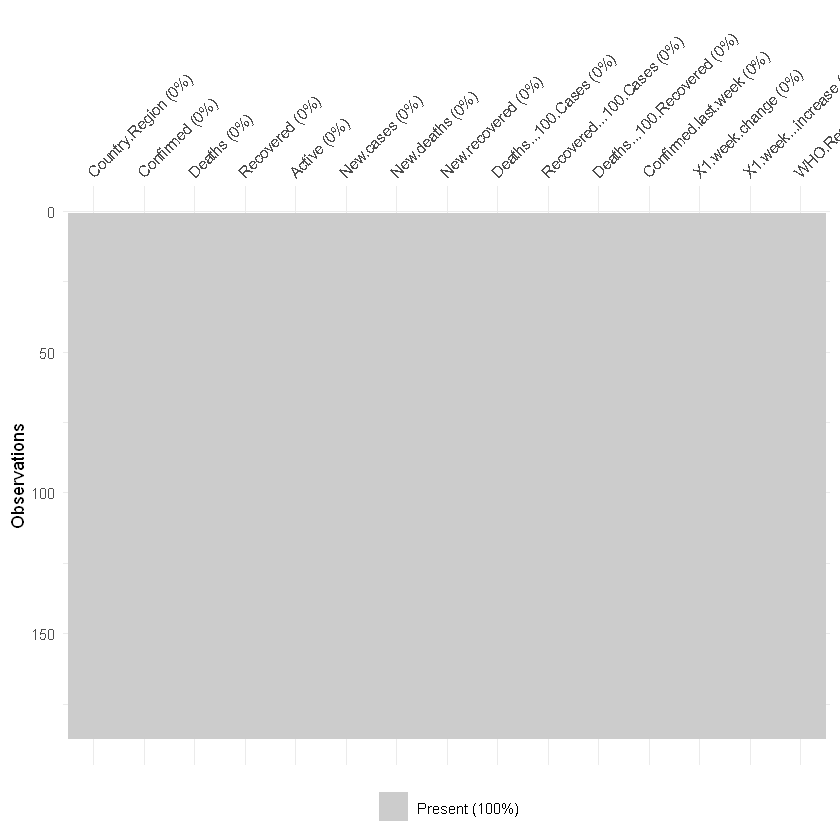

In [4]:
vis_miss(df)

In [5]:
# Removed a row with a strange value
df = df[!(df$Deaths...100.Recovered=="Inf" ),]

## EDA

In [6]:
print(colnames(df))

 [1] "Country.Region"         "Confirmed"              "Deaths"                
 [4] "Recovered"              "Active"                 "New.cases"             
 [7] "New.deaths"             "New.recovered"          "Deaths...100.Cases"    
[10] "Recovered...100.Cases"  "Deaths...100.Recovered" "Confirmed.last.week"   
[13] "X1.week.change"         "X1.week...increase"     "WHO.Region"            


### Univariate EDA

#### Confirmed

In [7]:
boxplot.stats(df$Confirmed)

$stats
[1]    10  1100  4970 39741 92482

$n
[1] 182

$conf
[1]  444.4669 9495.5331

$out
 [1]  167416  226225 2442375  347923  257101  220352  207112 1480073  100303
[10]  293606  112585  246286  395489  274289  389717  109597  816680  268934
[19]  452529  272421  227019 4290259  301708

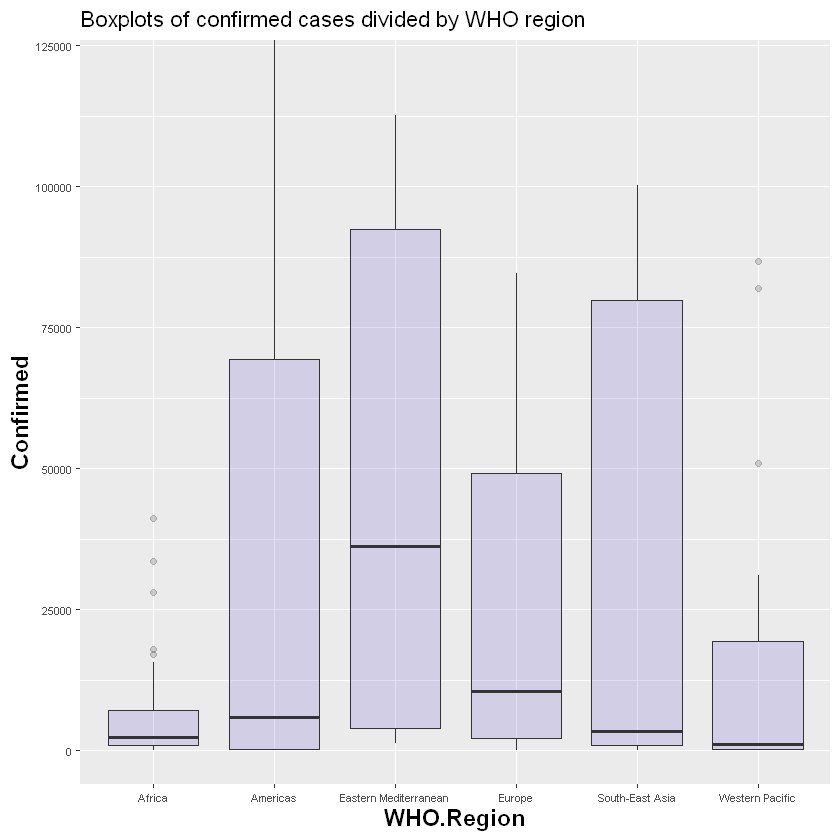

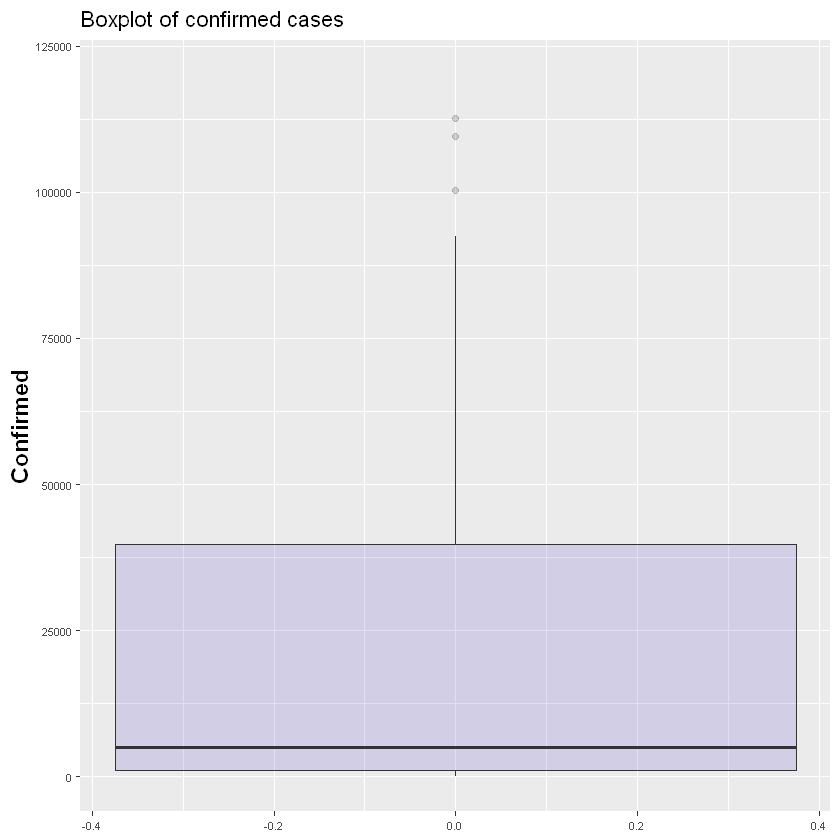

In [8]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of confirmed cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000)) 

Warning message:
"Removed 20 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


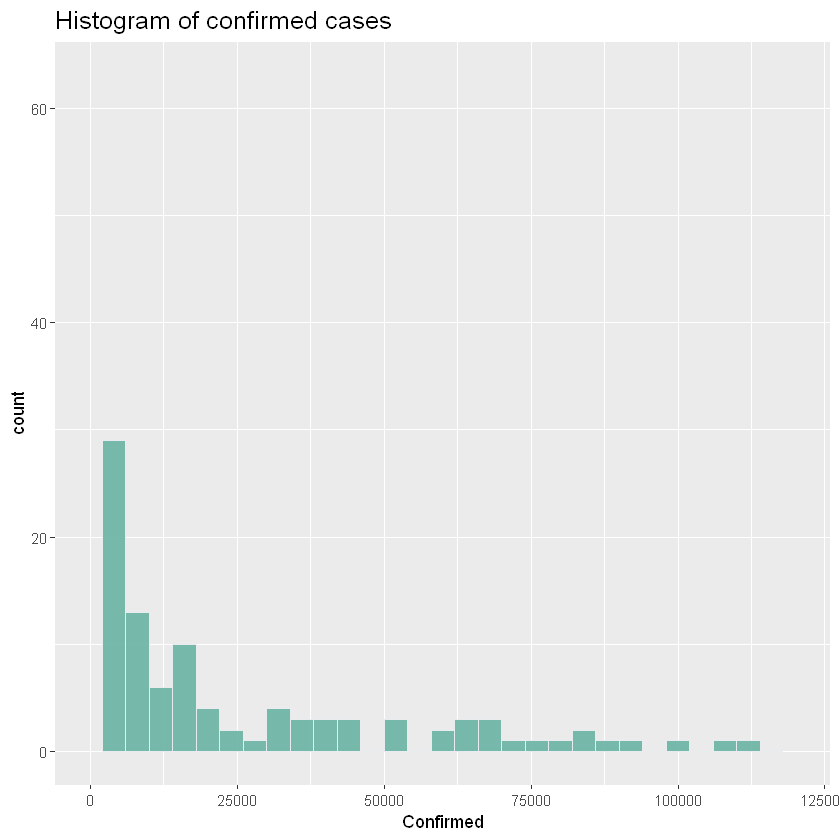

In [9]:
ggplot(df, aes(x=Confirmed)) +
    geom_histogram( binwidth=4000, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of confirmed cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,120000)
    

In [10]:
png(filename = "img/Confirmed_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of confirmed cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Confirmed_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000))

dev.off()

png(filename = "img/Confirmed_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Confirmed)) +
    geom_histogram( binwidth=4000, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of confirmed cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,120000)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 20 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Deaths

In [11]:
boxplot.stats(df$Deaths)

$stats
[1]    0.0   18.0  103.5  720.0 1764.0

$n
[1] 182

$conf
[1]  21.28359 185.71641

$out
 [1]   3059   2965   9822   2647  87618   9187   4656   8777   5532   4652
[11]  30212   9125  33408   4838  15912   4458  35112  44022   6160   5842
[21]  18418   1945   2206  13334   2760   7067  28432   1978   5630 148011
[31]  45844

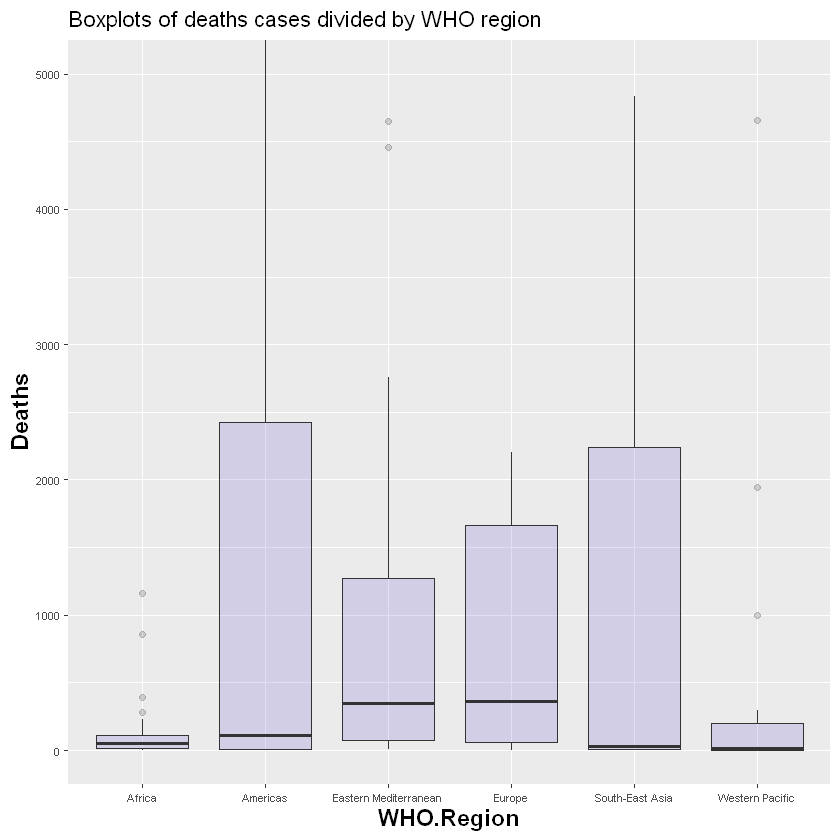

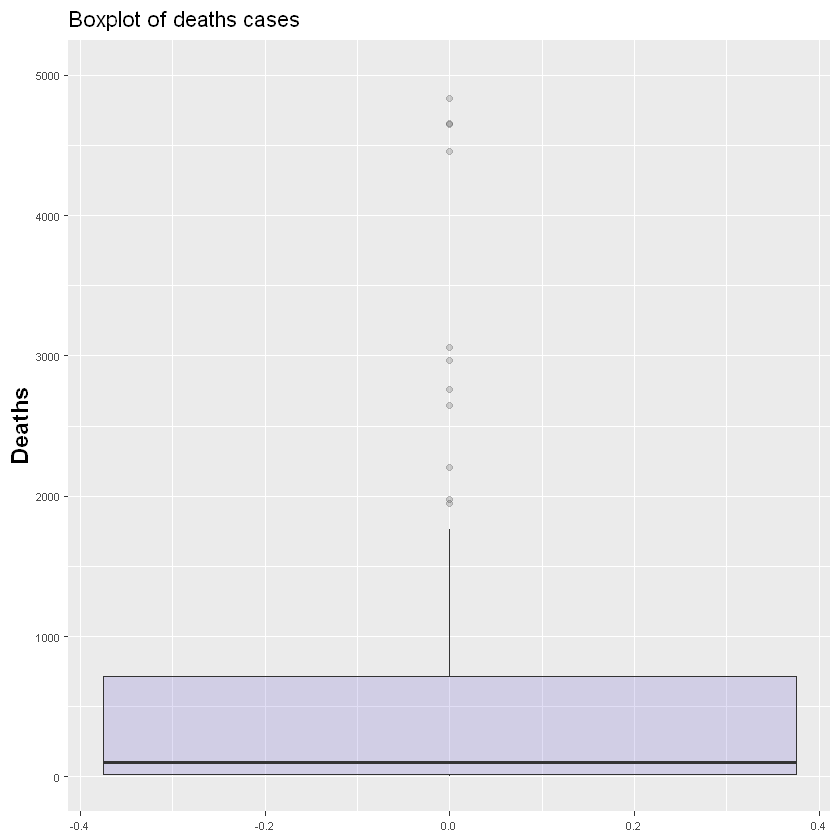

In [12]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 5000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of deaths cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 5000)) 

Warning message:
"Removed 20 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


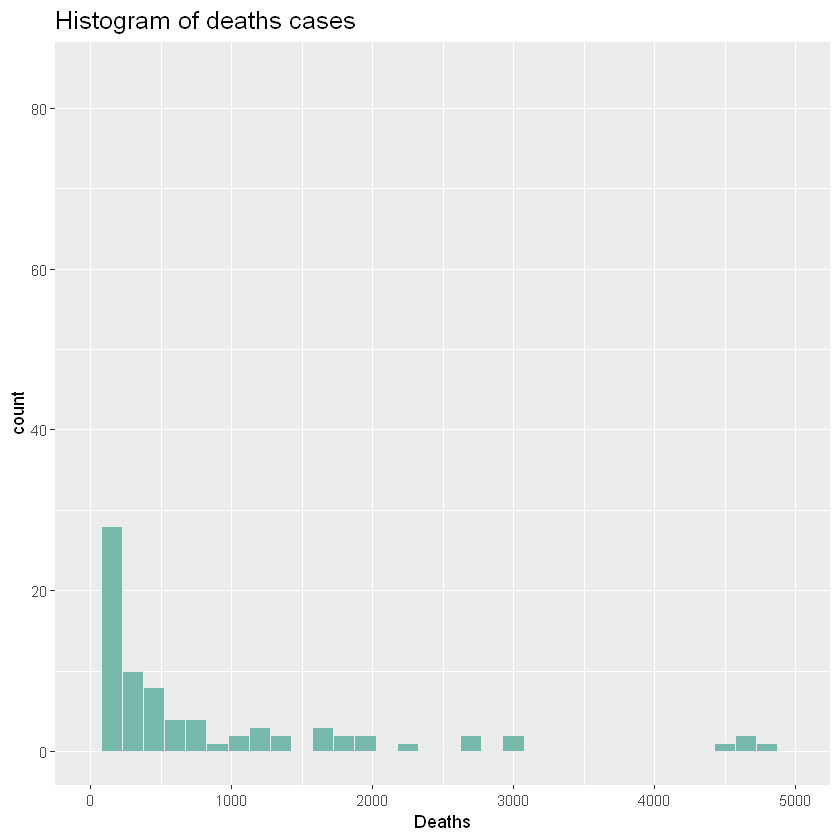

In [13]:
ggplot(df, aes(Deaths)) +
    geom_histogram( binwidth=150, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of deaths cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,5000)

In [14]:
png(filename = "img/Deaths_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 5000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Deaths_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of deaths cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 5000))

dev.off()

png(filename = "img/Deaths_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Deaths)) +
    geom_histogram( binwidth=150, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of deaths cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,5000)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 20 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Recovered

In [15]:
boxplot.stats(df$Recovered)

$stats
[1]     0   714  3220 23364 57028

$n
[1] 182

$conf
[1]  567.2911 5872.7089

$out
 [1]   72575  125683   60492 1846641  319954   78869  131161   81212  190314
[10]  951166   58173  255144   77144  198593  303810  241026  272547  106328
[19]  602249  222936  274925  150376  210469 1325804

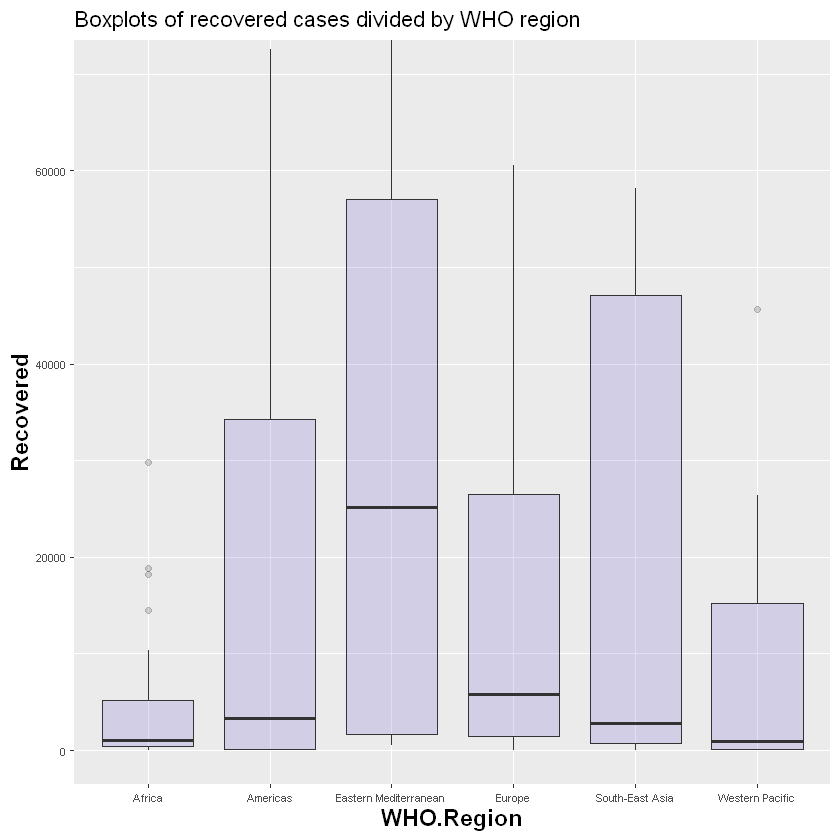

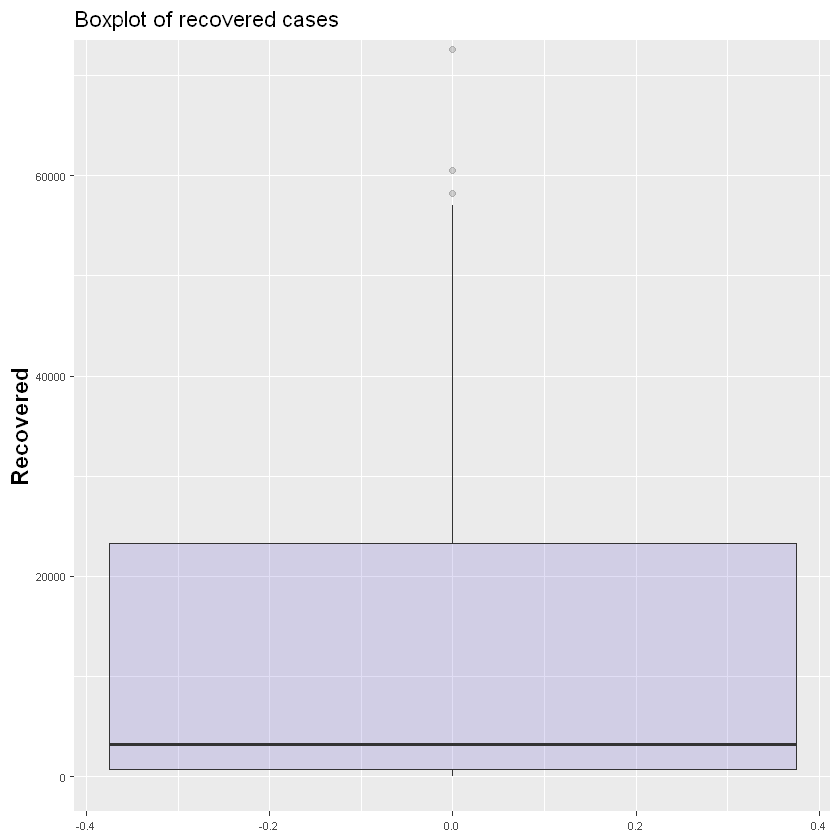

In [16]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of recovered cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 70000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of recovered cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 70000)) 

Warning message:
"Removed 22 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


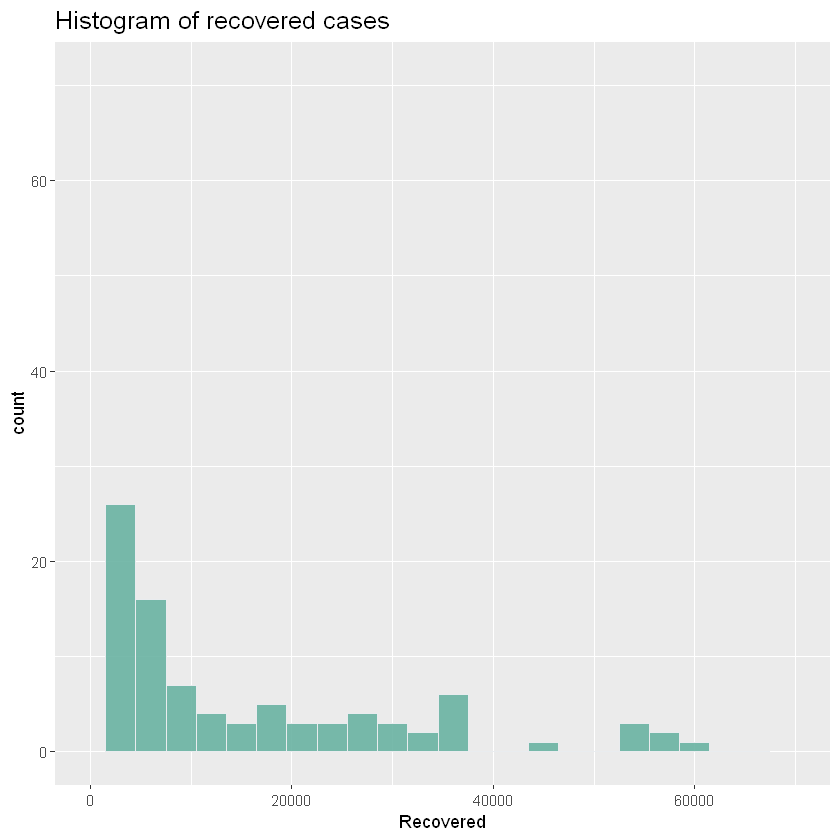

In [17]:
ggplot(df, aes(x=Recovered)) +
    geom_histogram( binwidth=3000, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of recovered cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,70000)
    

In [18]:
png(filename = "img/Recovered_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of recovered cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 70000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Recovered_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 70000))

dev.off()

png(filename = "img/Recovered_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Recovered)) +
    geom_histogram( binwidth=3000, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of confirmed cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,70000)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 22 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Active

In [19]:
boxplot.stats(df$Active)

$stats
[1]     0   129  1599  8870 19637

$n
[1] 182

$conf
[1]  575.2769 2622.7231

$out
 [1]   91782   97577   39154   47056  508116  117163   32869   40733   52992
[10]  108928   33536  495499   37292   22550   30983   36378   29659   47657
[19]   47064   22117   27421   25034   98752   53649  201097   43238  170537
[28]   93613 2816444   28258  254427

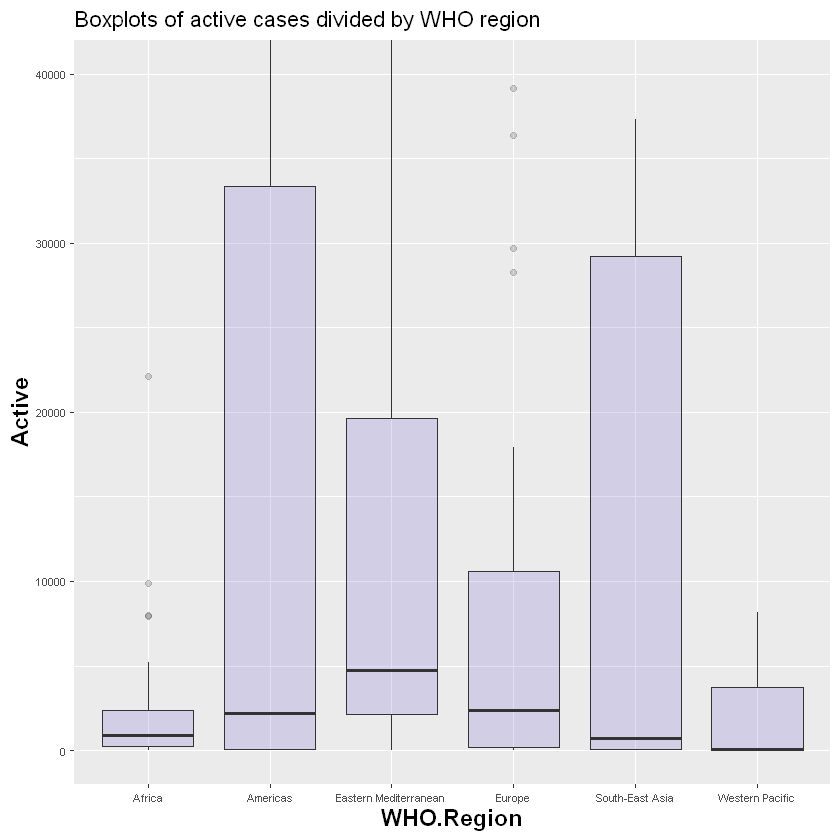

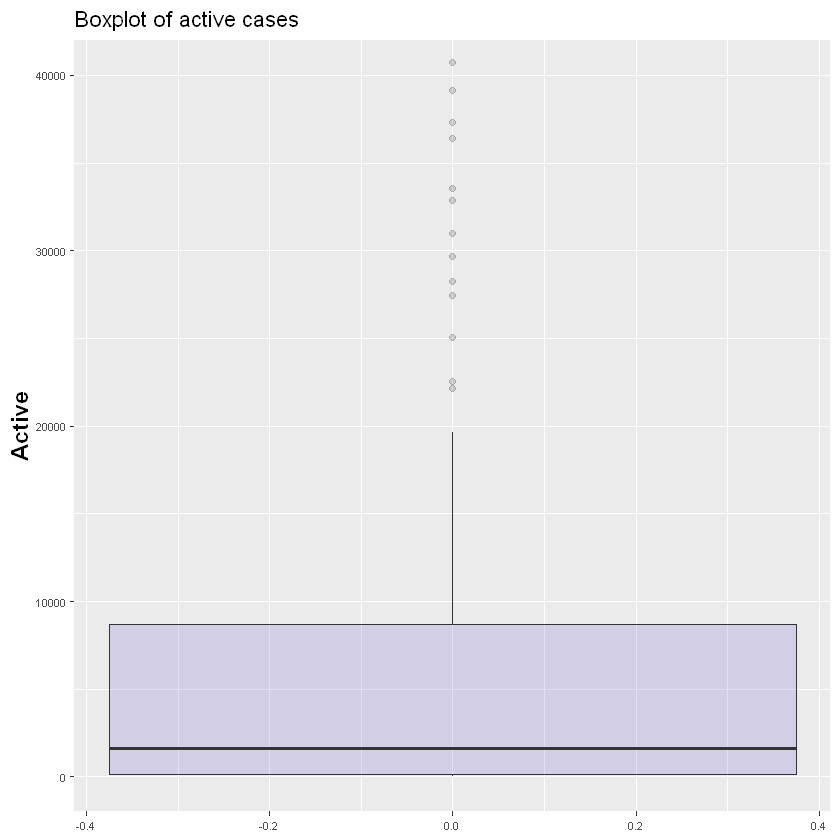

In [20]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Active)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of active cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 40000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Active)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of active cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 40000)) 

Warning message:
"Removed 19 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


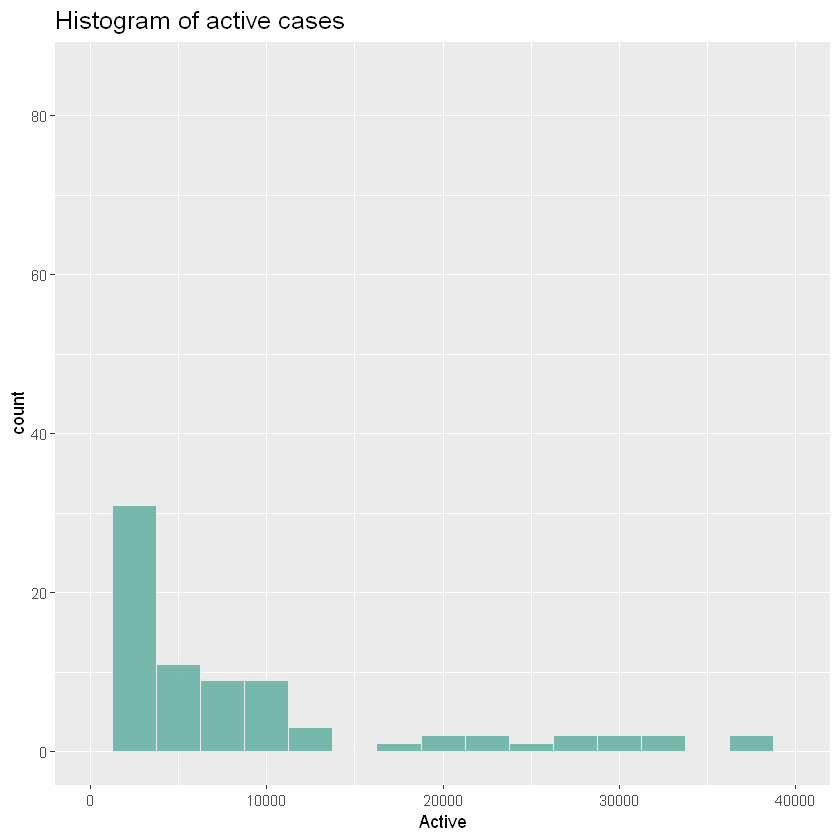

In [21]:
ggplot(df, aes(x=Active)) +
    geom_histogram( binwidth=2500, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of active cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,40000)
    

In [22]:
png(filename = "img/Active_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Active)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of active cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 40000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Active_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Active)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of active cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 40000))

dev.off()

png(filename = "img/Active_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Active)) +
    geom_histogram( binwidth=2500, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of active cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,40000)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 19 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### New cases

In [23]:
boxplot.stats(df$New.cases)

$stats
[1]   0   4  49 420 919

$n
[1] 182

$conf
[1]  0.2791649 97.7208351

$out
 [1]  4890  2772  1752 23284  2133 16306  1248  2551 44457  1525  2434  2553
[13]  2029  1526  4973  1053  1176  1146 13756  1592  1104  5607  1993  7096
[25] 56336

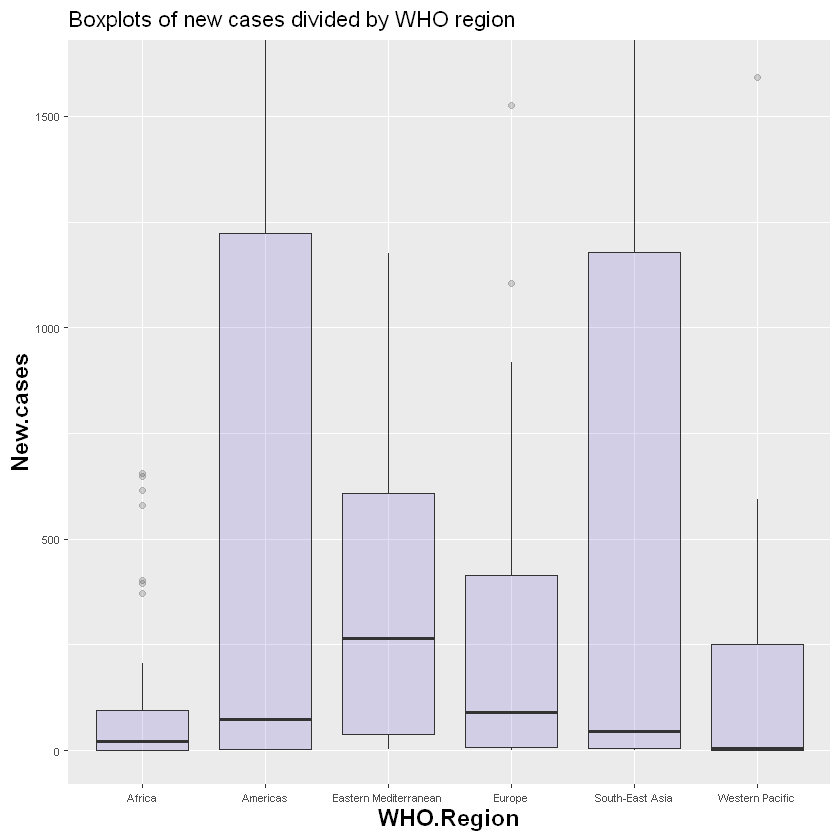

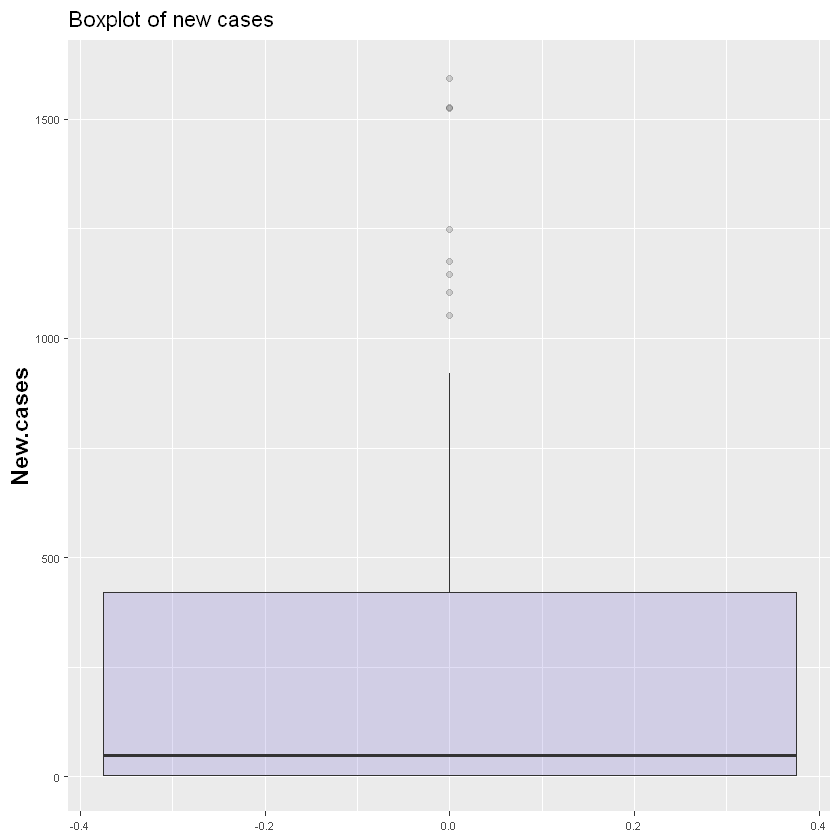

In [24]:
ggplot(df, aes(x=as.factor(WHO.Region), y=New.cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of new cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1600)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=New.cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of new cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1600)) 

Warning message:
"Removed 17 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


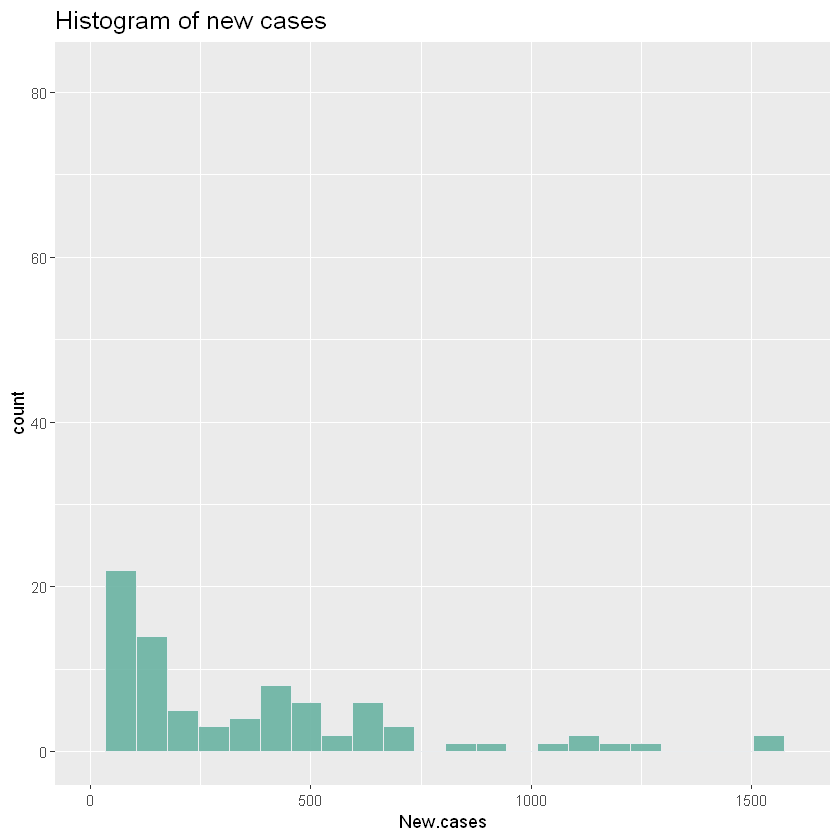

In [25]:
ggplot(df, aes(x=New.cases)) +
    geom_histogram( binwidth=70, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of new cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,1600)
    

In [26]:
png(filename = "img/New_cases_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=New.cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of new cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1600)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/New_cases_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=New.cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of new cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1600))

dev.off()

png(filename = "img/New_cases_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(New.cases)) +
    geom_histogram( binwidth=70, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of new cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,1600)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 17 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### New deaths

In [27]:
boxplot.stats(df$New.deaths)

$stats
[1]  0  0  1  6 14

$n
[1] 182

$conf
[1] 0.2972956 1.7027044

$out
 [1]  120   37   64  614   75  508   20   17   46   17   27   50  637   57  212
[16]   96   16   24  342   20   28  575   19   85   27  298   17 1076

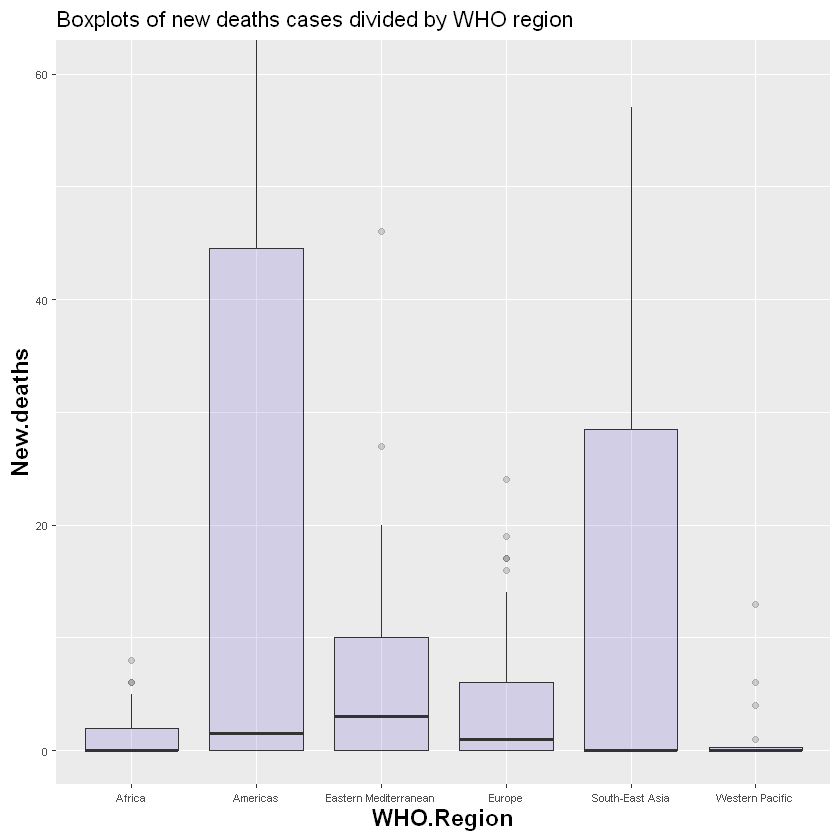

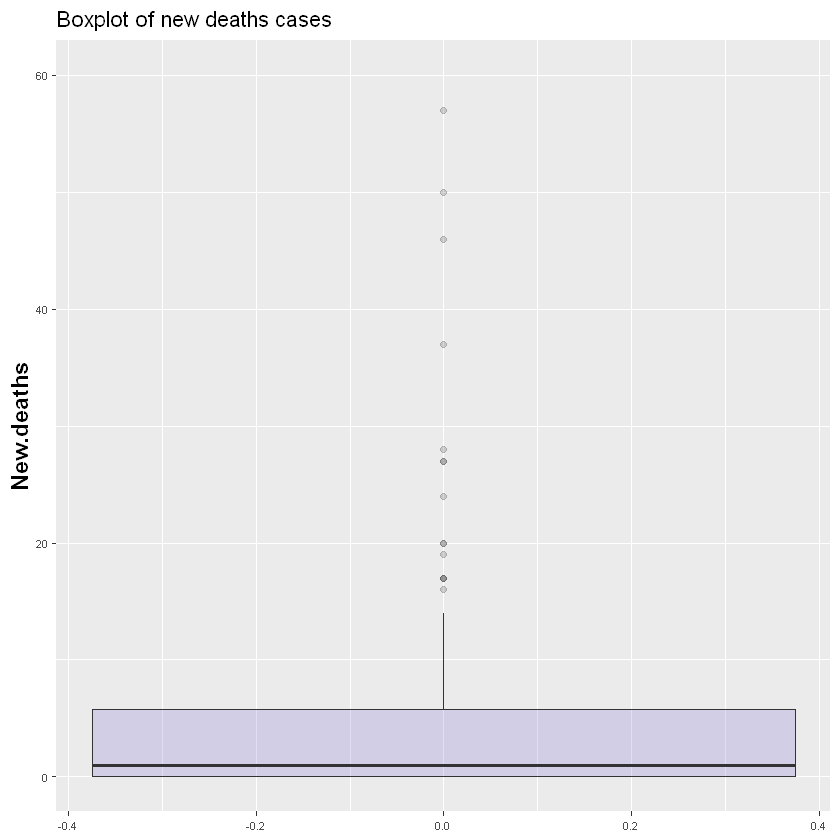

In [28]:
ggplot(df, aes(x=as.factor(WHO.Region), y=New.deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of new deaths cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 60)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=New.deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of new deaths cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 60)) 

Warning message:
"Removed 13 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


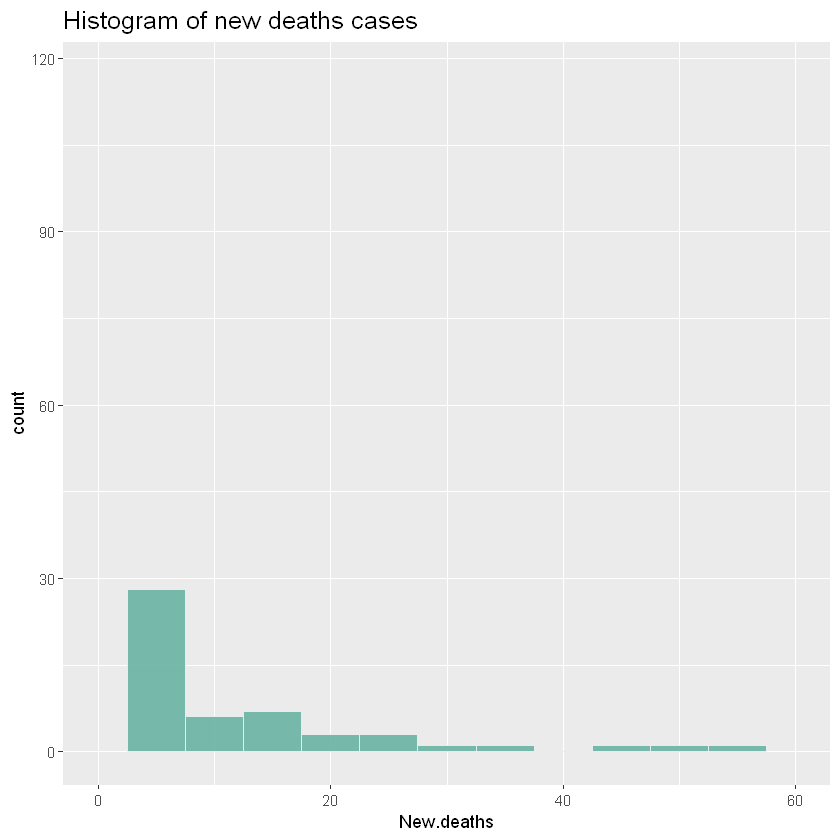

In [29]:
ggplot(df, aes(x=New.deaths)) +
    geom_histogram( binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of new deaths cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,60)
    

In [30]:
png(filename = "img/New_deaths_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=New.deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of new deaths cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 60)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/New_deaths_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=New.deaths)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of new deaths cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 60))

dev.off()

png(filename = "img/New_deaths_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(New.deaths)) +
    geom_histogram( binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of new deaths cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,60)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 13 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### New recovered

In [31]:
boxplot.stats(df$New.recovered)

$stats
[1]   0   0  24 230 569

$n
[1] 182

$conf
[1] -2.937 50.937

$out
 [1]   749  2057  1801 33728  1859 11494  1601  1007   843 33598  1518  1931
[13]  1927  1833   684   817   681  8588   626   829  1729  3592   955  4697
[25]  3077  2613  9848   982 27941

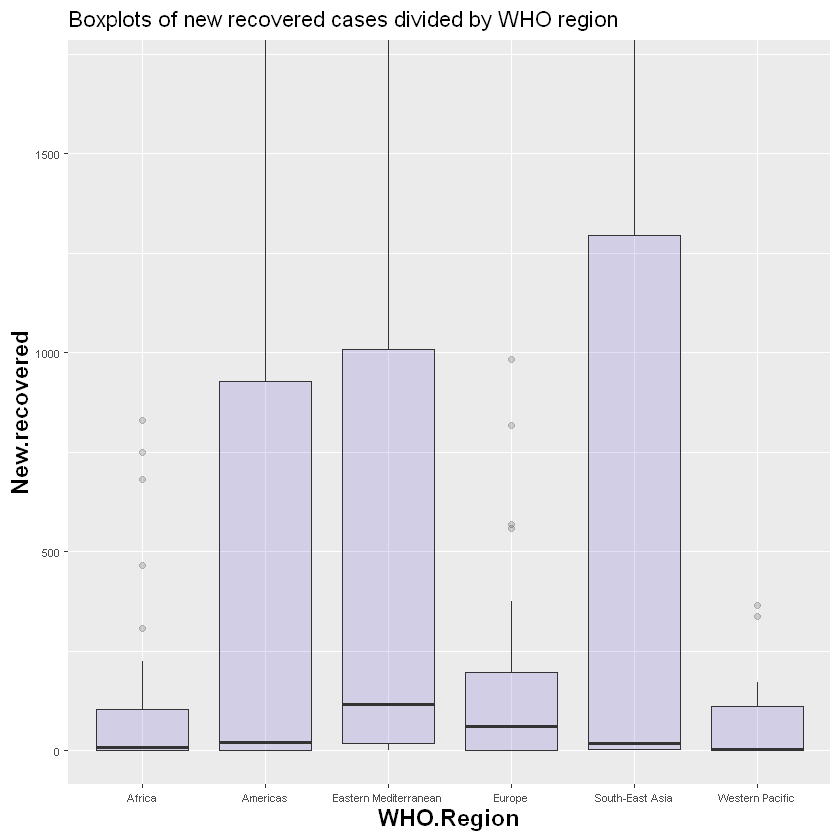

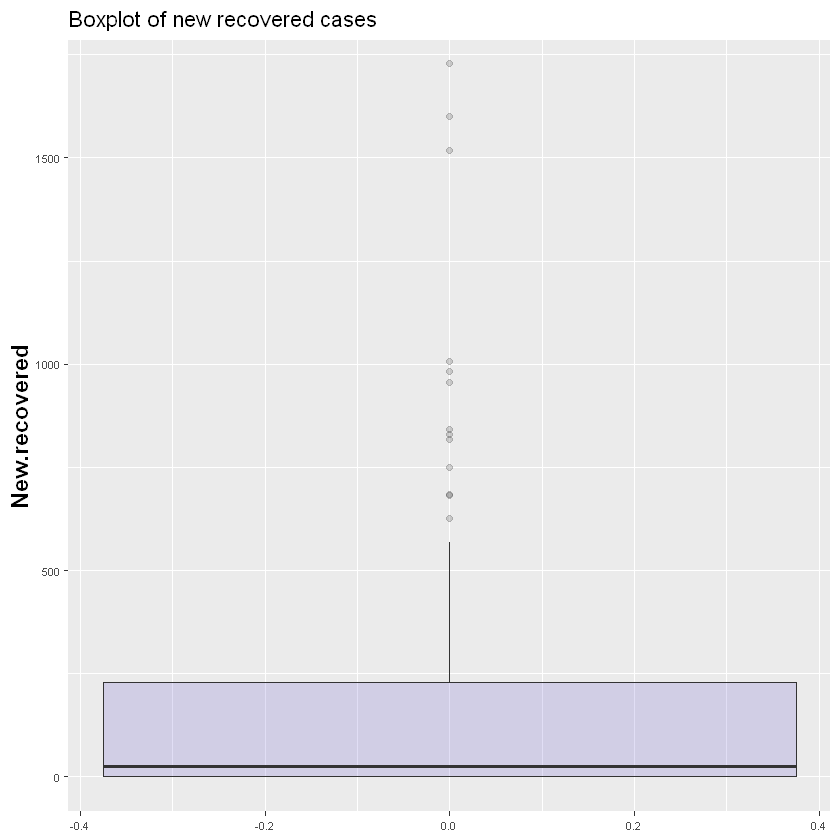

In [32]:
ggplot(df, aes(x=as.factor(WHO.Region), y=New.recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of new recovered cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1700)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=New.recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of new recovered cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1700)) 

Warning message:
"Removed 17 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


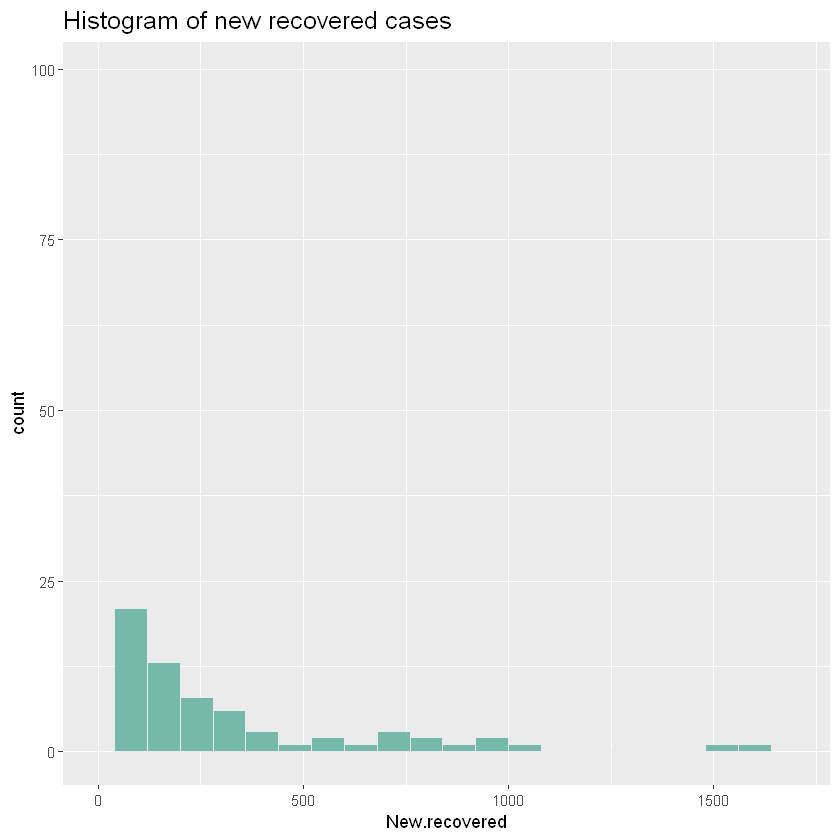

In [33]:
ggplot(df, aes(x=New.recovered)) +
    geom_histogram( binwidth=80, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of new recovered cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,1700)
    

In [34]:
png(filename = "img/New_recovered_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=New.recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of new recovered cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1700)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/New_recovered_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=New.recovered)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of new recovered cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 1700))

dev.off()

png(filename = "img/New_recovered_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(New.recovered)) +
    geom_histogram( binwidth=80, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of new recovered cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,1700)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 17 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Deaths / 100 Cases

In [35]:
boxplot.stats(df$Deaths...100.Cases)

$stats
[1] 0.00 0.94 2.13 3.72 6.82

$n
[1] 182

$conf
[1] 1.804414 2.455586

$out
 [1] 14.79  8.13 13.71 13.40 14.26 11.13 11.53 10.44 15.19 10.00 28.56

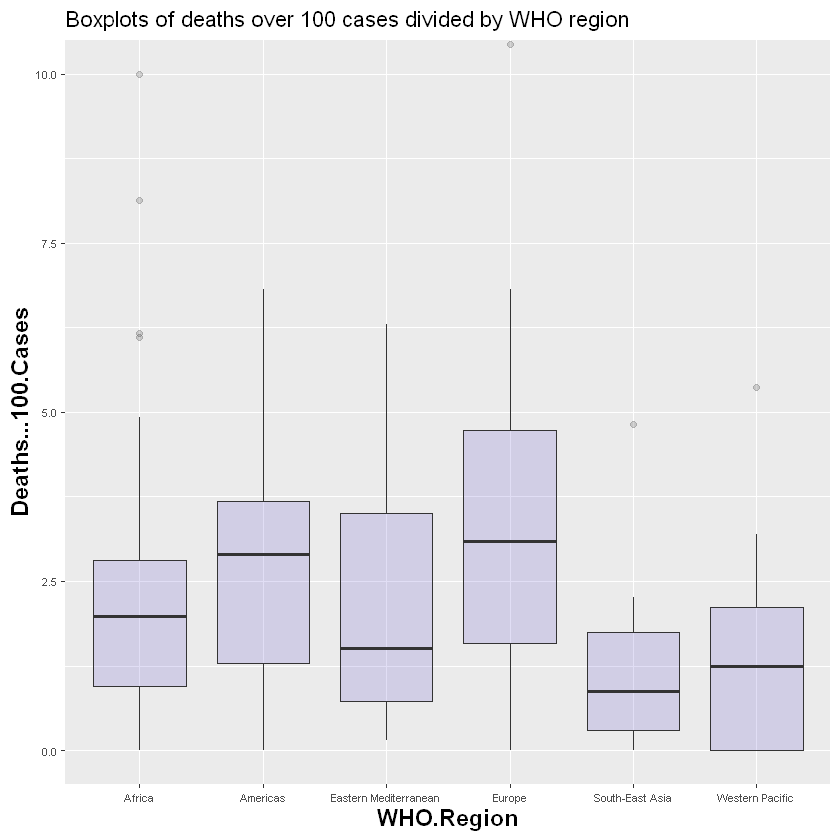

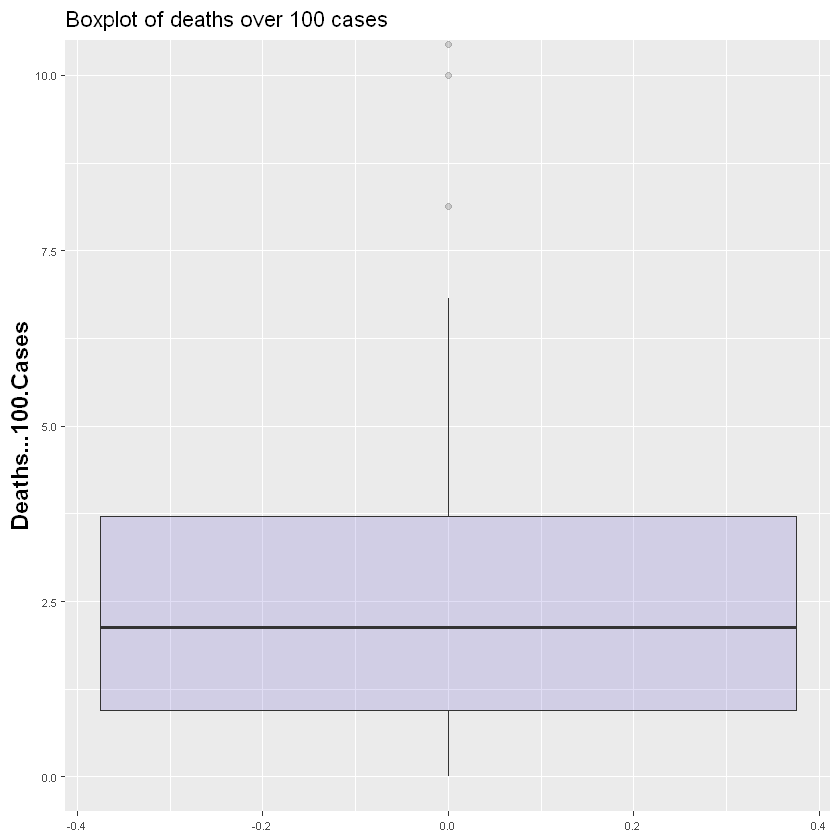

In [36]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths over 100 cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 10)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of deaths over 100 cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 10)) 

Warning message:
"Removed 9 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


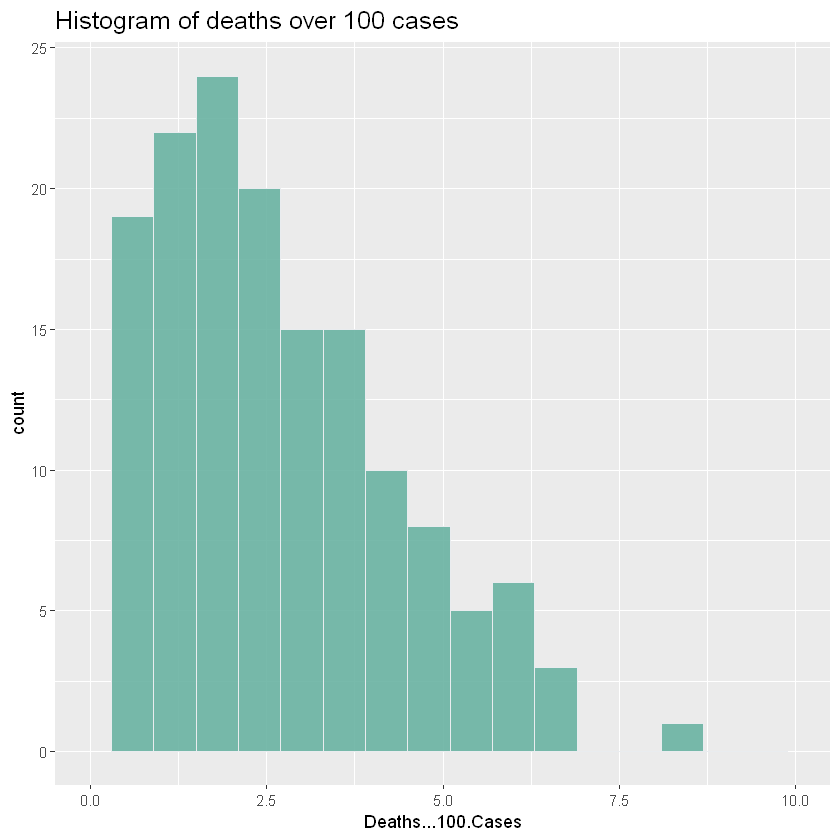

In [37]:
ggplot(df, aes(x=Deaths...100.Cases)) +
    geom_histogram( binwidth=0.6, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of deaths over 100 cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,10)
    

In [38]:
png(filename = "img/Deaths_over_100_cases_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths over 100 cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 10)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Deaths_over_100_cases_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of deaths over 100 cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 10))

dev.off()

png(filename = "img/Deaths_over_100_cases_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Deaths...100.Cases)) +
    geom_histogram( binwidth=0.6, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of deaths over 100 cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,10)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 9 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Recovered / 100 Cases

In [39]:
boxplot.stats(df$Recovered...100.Cases)

$stats
[1]   0.00  51.73  72.27  87.41 100.00

$n
[1] 182

$conf
[1] 68.09125 76.44875

$out
numeric(0)

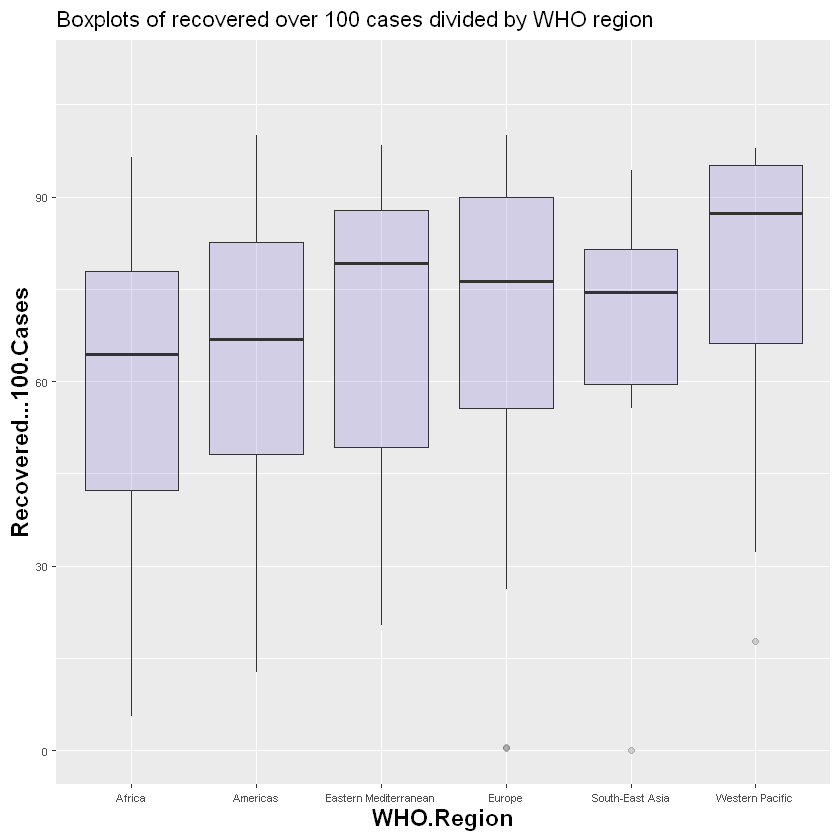

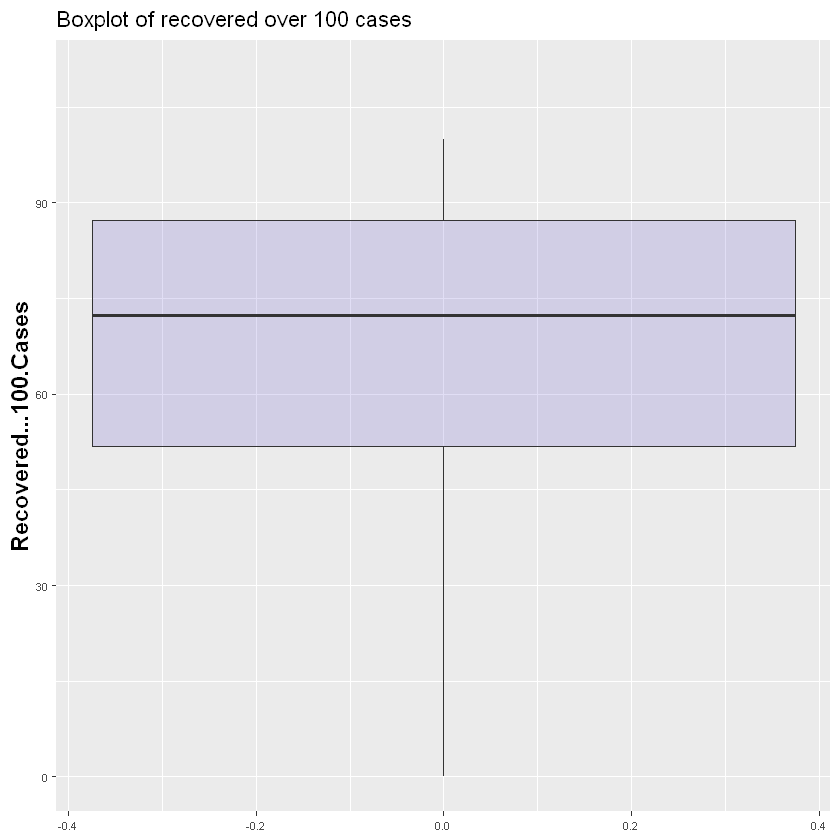

In [40]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Recovered...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of recovered over 100 cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 110)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Recovered...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of recovered over 100 cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 110))

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


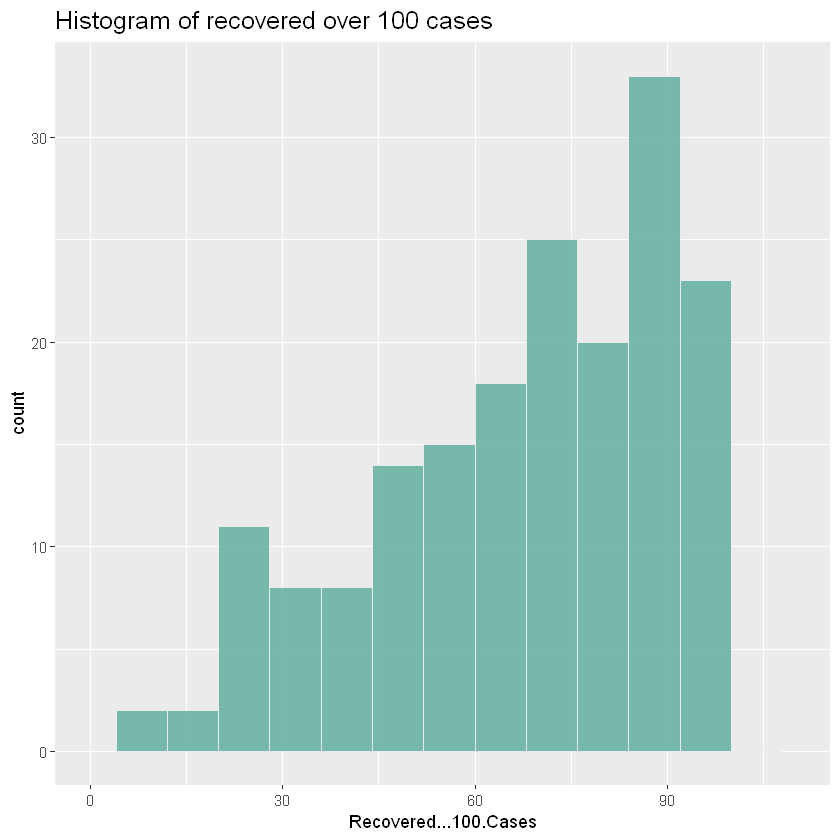

In [41]:
ggplot(df, aes(x=Recovered...100.Cases)) +
    geom_histogram( binwidth=8, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of recovered over 100 cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,110)
    

In [42]:
png(filename = "img/Recovered_over_100_cases_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Recovered...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of recovered over 100 cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 110)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Recovered_over_100_cases_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Confirmed)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of recovered over 100 cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 110))

dev.off()

png(filename = "img/Recovered_over_100_cases_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Recovered...100.Cases)) +
    geom_histogram( binwidth=8, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of recovered over 100 cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,110)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Deaths / 100 Recovered

In [43]:
boxplot.stats(df$Deaths...100.Cases)

$stats
[1] 0.00 0.94 2.13 3.72 6.82

$n
[1] 182

$conf
[1] 1.804414 2.455586

$out
 [1] 14.79  8.13 13.71 13.40 14.26 11.13 11.53 10.44 15.19 10.00 28.56

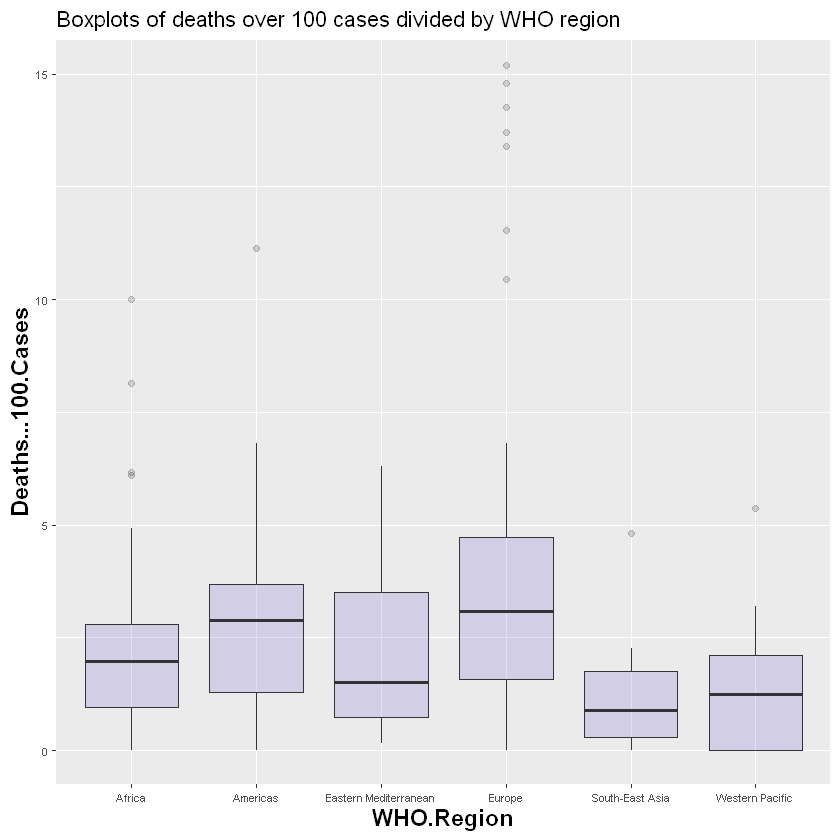

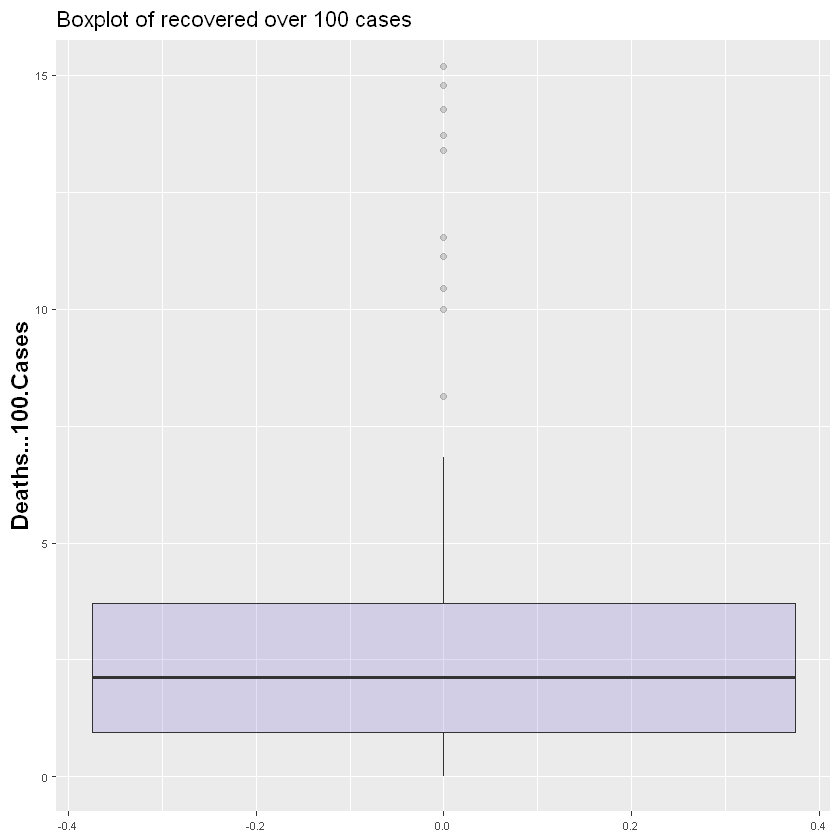

In [44]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths over 100 cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 15)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of recovered over 100 cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 15)) 

Warning message:
"Removed 2 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


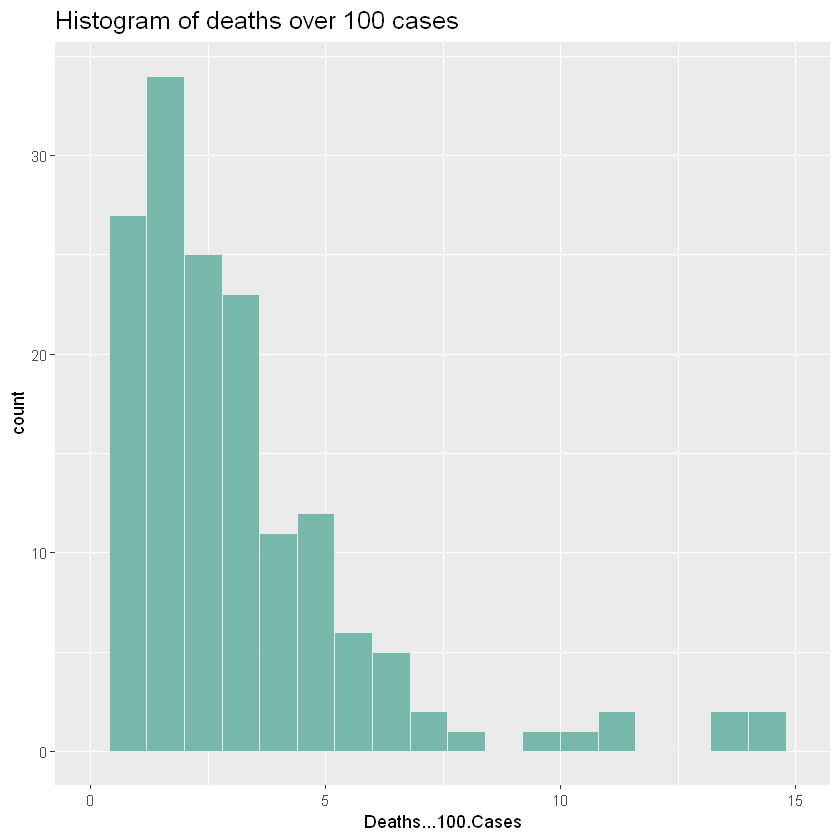

In [45]:
ggplot(df, aes(x=Deaths...100.Cases)) +
    geom_histogram( binwidth=0.8, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of deaths over 100 cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,15)
    

In [46]:
png(filename = "img/Deaths_over_100_cases_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of deaths over 100 cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 15)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Deaths_over_100_cases_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Deaths...100.Cases)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of deaths over 100 cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 15))

dev.off()

png(filename = "img/Deaths_over_100_cases_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Deaths...100.Cases)) +
    geom_histogram( binwidth=0.8, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of deaths over 100 cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,15)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 2 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### Confirmed last week

In [47]:
boxplot.stats(df$Confirmed.last.week)

$stats
[1]    10  1039  4784 36936 88402

$n
[1] 182

$conf
[1]  579.837 8988.163

$out
 [1]  130774  207453 2118646  333029  204005  214023  203325 1155338  276202
[10]   94693  244624  349396  266096  357681  107037  776212  253349  373628
[19]  264836  220572 3834677  296944

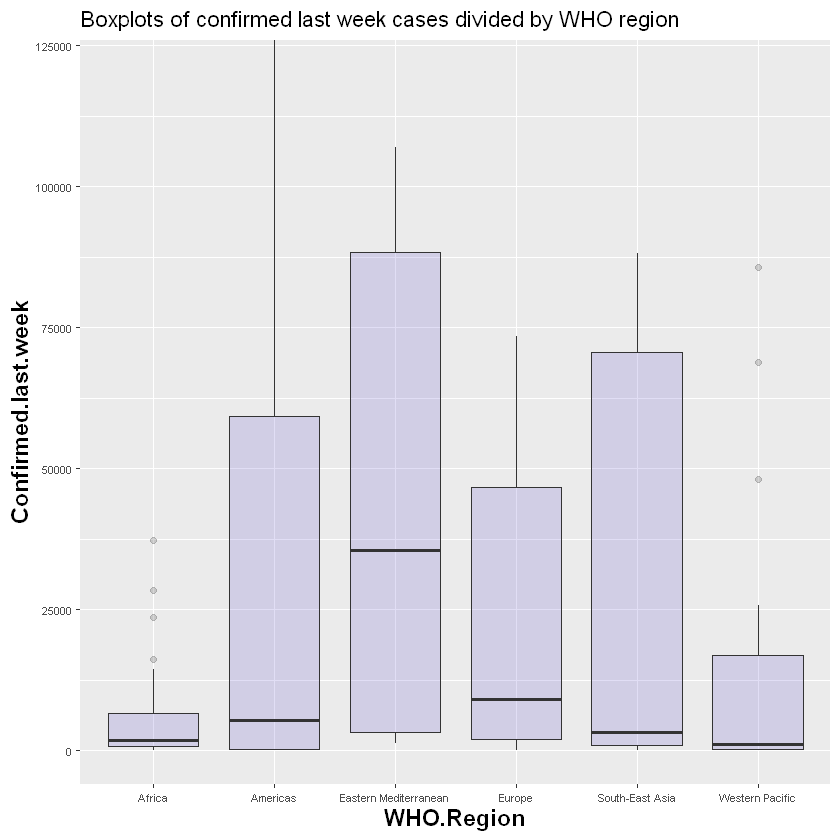

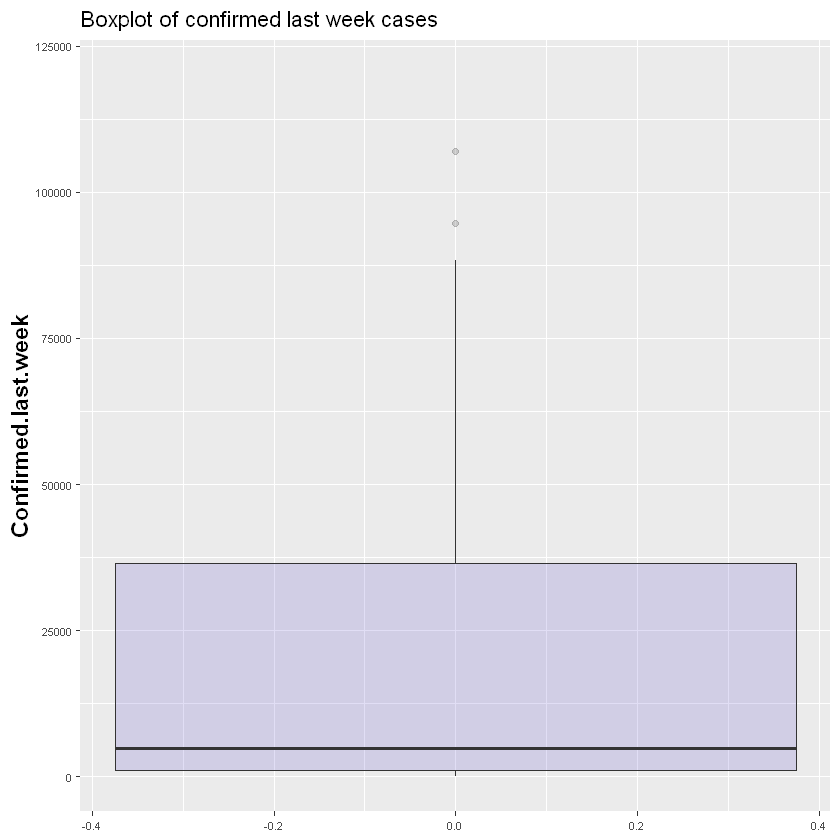

In [48]:
ggplot(df, aes(x=as.factor(WHO.Region), y=Confirmed.last.week)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of confirmed last week cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=Confirmed.last.week)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed last week cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000)) 

Warning message:
"Removed 20 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


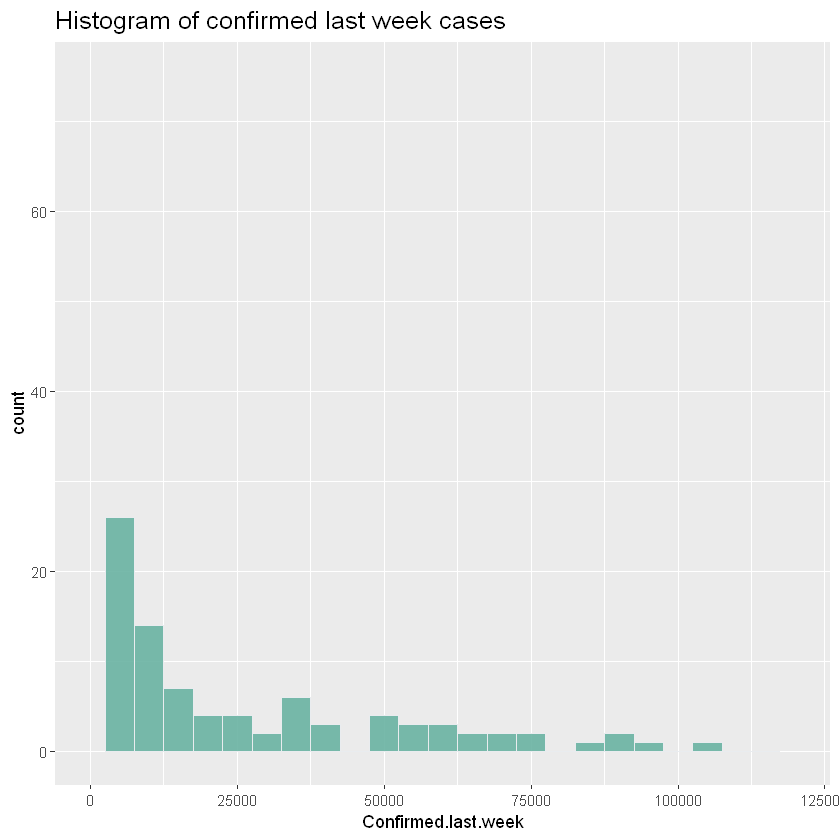

In [49]:
ggplot(df, aes(x=Confirmed.last.week)) +
    geom_histogram( binwidth=5000, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of confirmed last week cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,120000)
    

In [50]:
png(filename = "img/Confirmed_last_week_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=Confirmed.last.week)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of confirmed last week cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/Confirmed_last_week_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=Confirmed.last.week)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of confirmed last week cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 120000))

dev.off()

png(filename = "img/Confirmed_last_week_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Confirmed.last.week)) +
    geom_histogram( binwidth=5000, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of confirmed last week cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,120000)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 20 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### 1 week change

In [51]:
boxplot.stats(df$X1.week.change)

$stats
[1]  -47   47  418 3325 8193

$n
[1] 182

$conf
[1]  34.08919 801.91081

$out
 [1]  36642  18772  10190 323729  14894  53096  10200 324735  12089  17404
[11]  17892  11982  11180  46093   8658  32036  13142  40468  15585  78901
[21] 455582

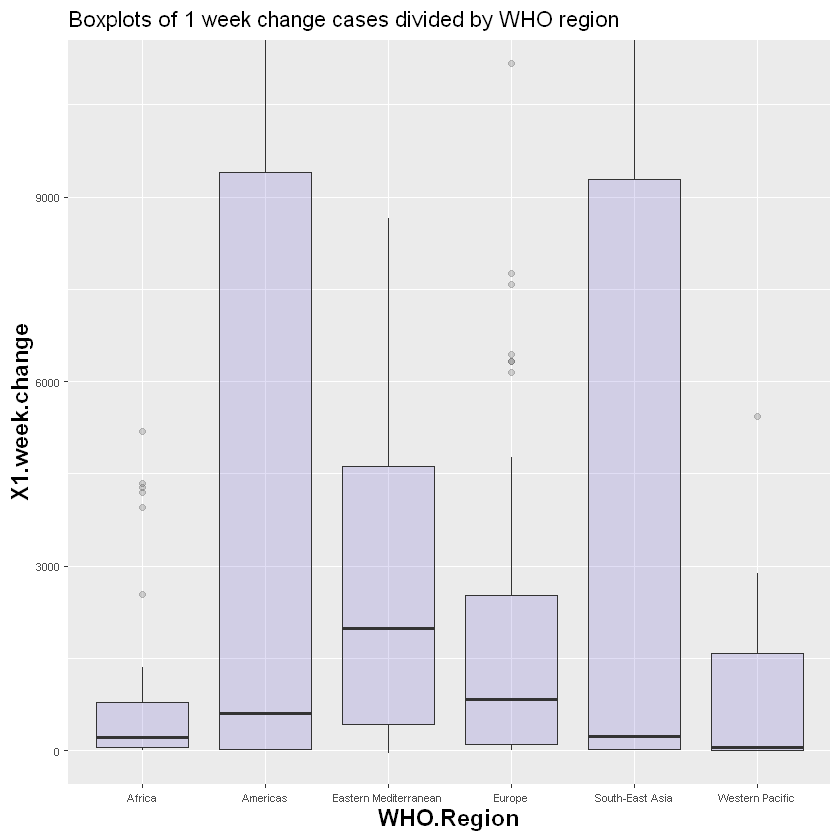

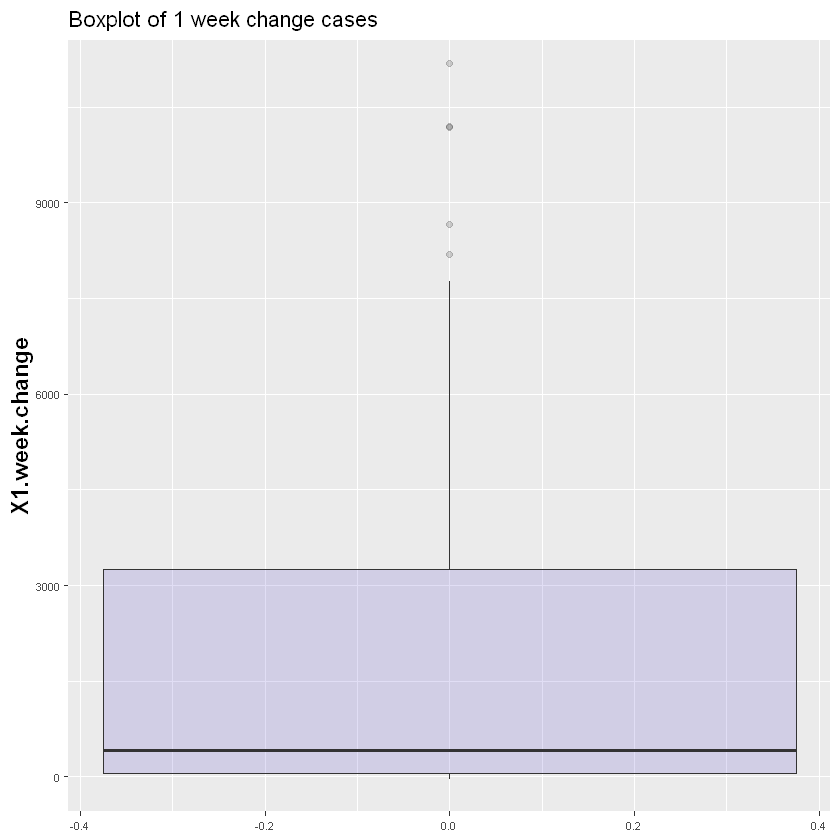

In [52]:
ggplot(df, aes(x=as.factor(WHO.Region), y=X1.week.change)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of 1 week change cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 11000)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=X1.week.change)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of 1 week change cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 11000)) 

Warning message:
"Removed 19 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


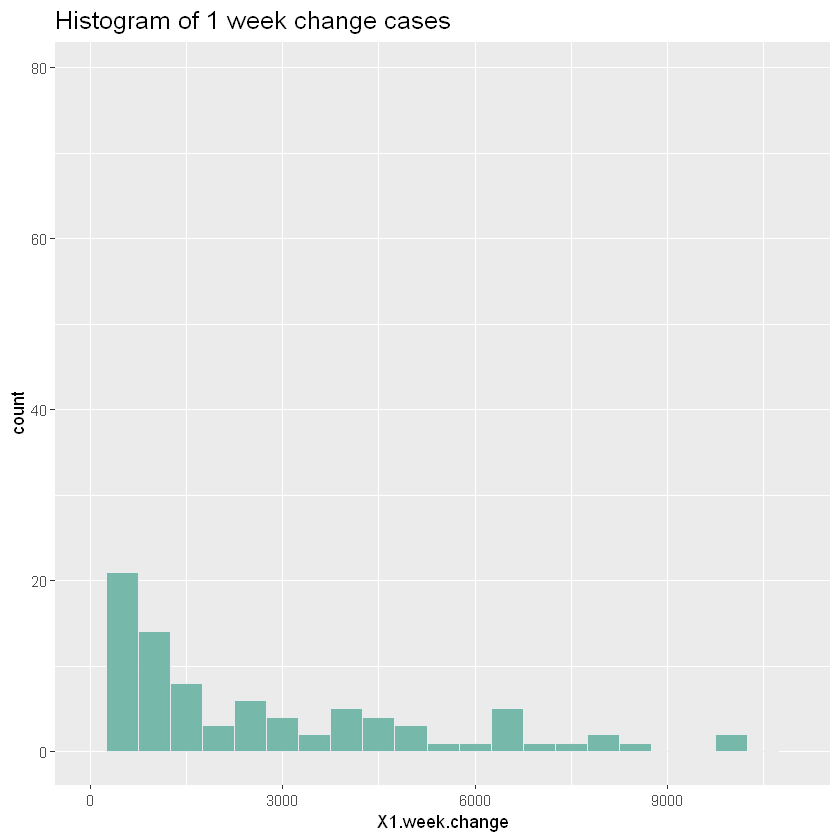

In [53]:
ggplot(df, aes(x=X1.week.change)) +
    geom_histogram( binwidth=500, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of 1 week change cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,11000)
    

In [54]:
png(filename = "img/1_week_change_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=X1.week.change)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of 1 week change cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 11000)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/1_week_change_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=X1.week.change)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of 1 week change cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 11000))

dev.off()

png(filename = "img/1_week_change_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(X1.week.change)) +
    geom_histogram( binwidth=500, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of 1 week change cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,11000)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 19 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### 1 week % increase

In [55]:
boxplot.stats(df$X1.week...increase)

$stats
[1] -3.84  2.75  6.89 17.00 37.44

$n
[1] 182

$conf
[1] 5.221077 8.558923

$out
[1] 119.54  41.57  42.52 191.07  40.67  42.78 226.32  57.85

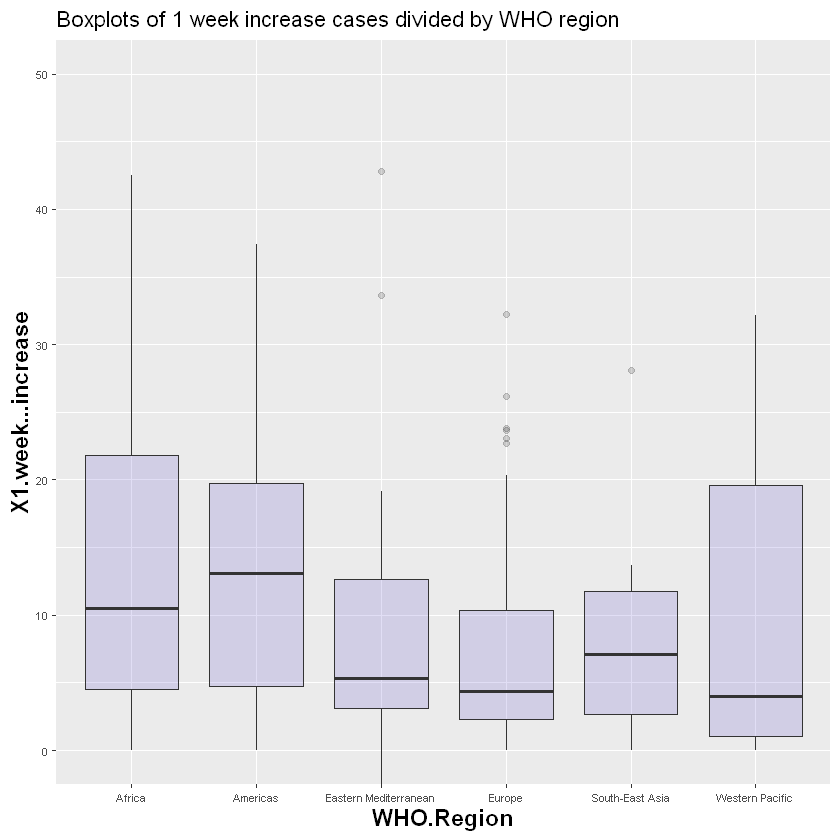

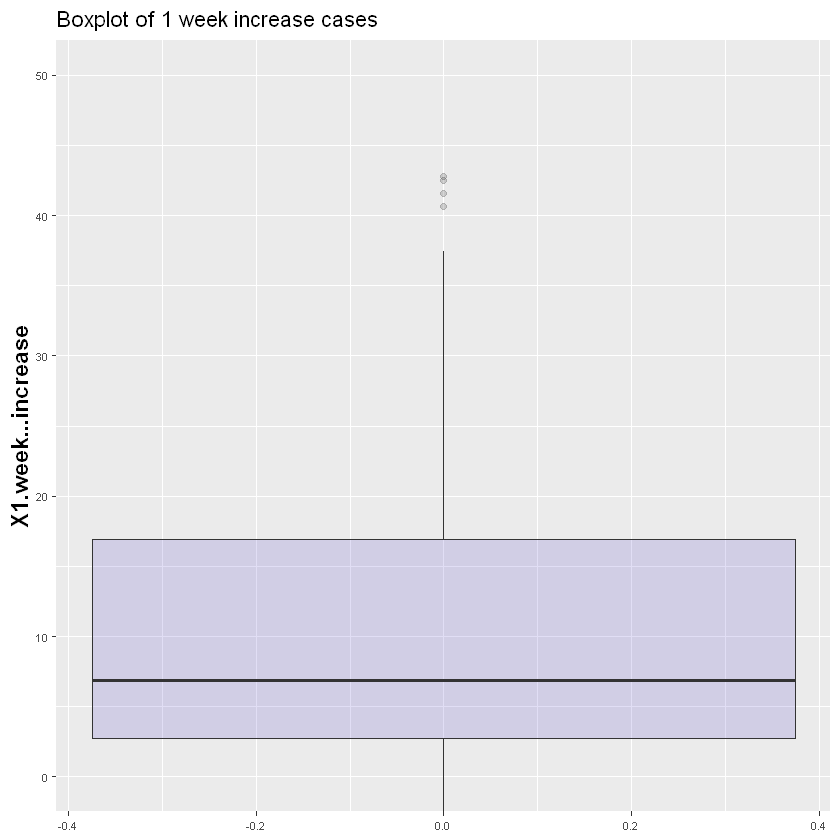

In [56]:
ggplot(df, aes(x=as.factor(WHO.Region), y=X1.week...increase)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of 1 week increase cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 50)) + 
    xlab("WHO.Region")

ggplot(df, aes(y=X1.week...increase)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of 1 week increase cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 50)) 

Warning message:
"Removed 5 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


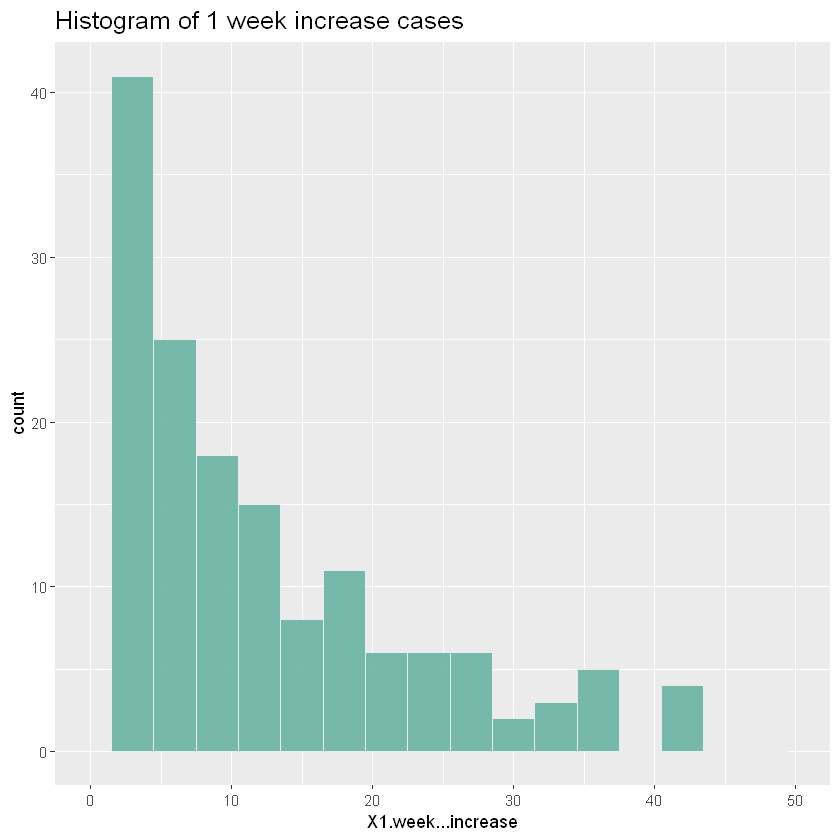

In [57]:
ggplot(df, aes(x=X1.week...increase)) +
    geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9, position = 'identity') +
    ggtitle("Histogram of 1 week increase cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,50)
    

In [58]:
png(filename = "img/1_week_increase_conditional_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=as.factor(WHO.Region), y=X1.week...increase)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplots of 1 week increase cases divided by WHO region") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14,face="bold")
    ) +
    coord_cartesian(ylim = c(0, 50)) +
    xlab("WHO.Region")

dev.off()

png(filename = "img/1_week_increase_boxplot.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(y=X1.week...increase)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    ggtitle("Boxplot of 1 week increase cases") +
    theme(
        axis.text=element_text(size=6.5), 
        axis.title=element_text(size=14, face="bold")
    ) +
    coord_cartesian(ylim = c(0, 50))

dev.off()

png(filename = "img/1_week_increase_histogram.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(Confirmed)) +
    geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Histogram of 1 week increase cases") +
    theme(plot.title = element_text(size=15)) +
    xlim(0,50)

dev.off()

png 
  2

png 
  2

Warning message:
"Removed 171 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


png 
  2

#### WHO Region

In [59]:
table(df$WHO.Region)


               Africa              Americas Eastern Mediterranean 
                   47                    34                    21 
               Europe       South-East Asia       Western Pacific 
                   54                    10                    16 

### Multivariate EDA

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 28 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 28 rows containing missing values (`geom_point()`)."


png 
  2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 28 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 28 rows containing missing values (`geom_point()`)."


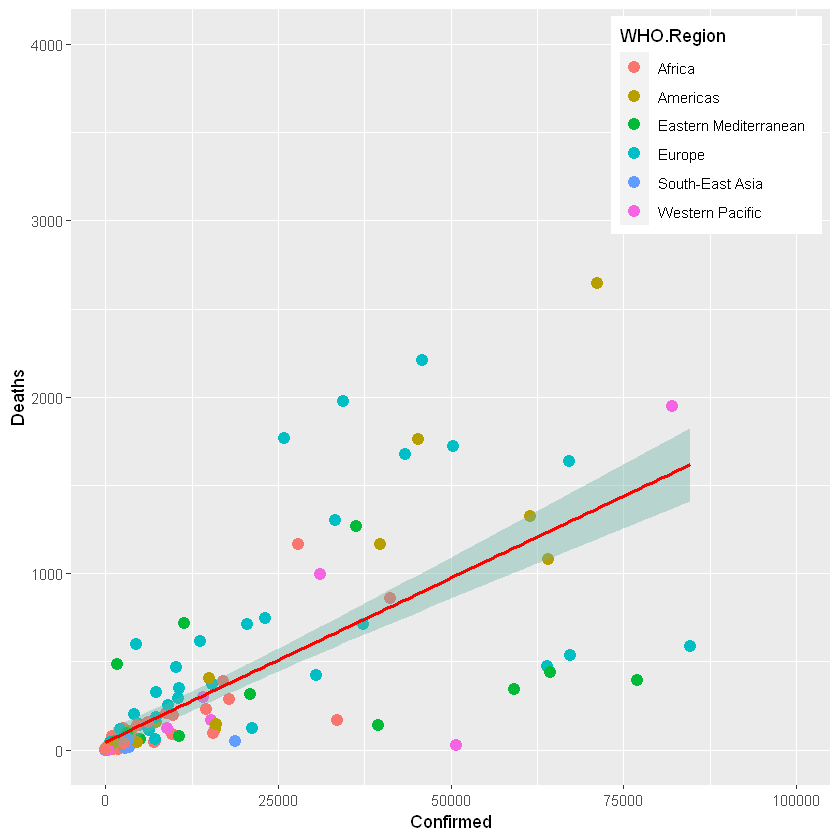

In [60]:
png(filename = "img/Scatter_confirmed_vs_deaths.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=Confirmed, y=Deaths, color=WHO.Region)) + 
    geom_point(size=3) +
    geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
    xlim(0,100000) +
    ylim(0,4000) +
    theme(legend.position = c(0.8, 0.8))

dev.off()


ggplot(df, aes(x=Confirmed, y=Deaths, color=WHO.Region)) + 
    geom_point(size=3) +
    geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
    xlim(0,100000) +
    ylim(0,4000) +
    theme(legend.position = c(0.85, 0.85))


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 23 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 23 rows containing missing values (`geom_point()`)."


png 
  2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 23 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 23 rows containing missing values (`geom_point()`)."


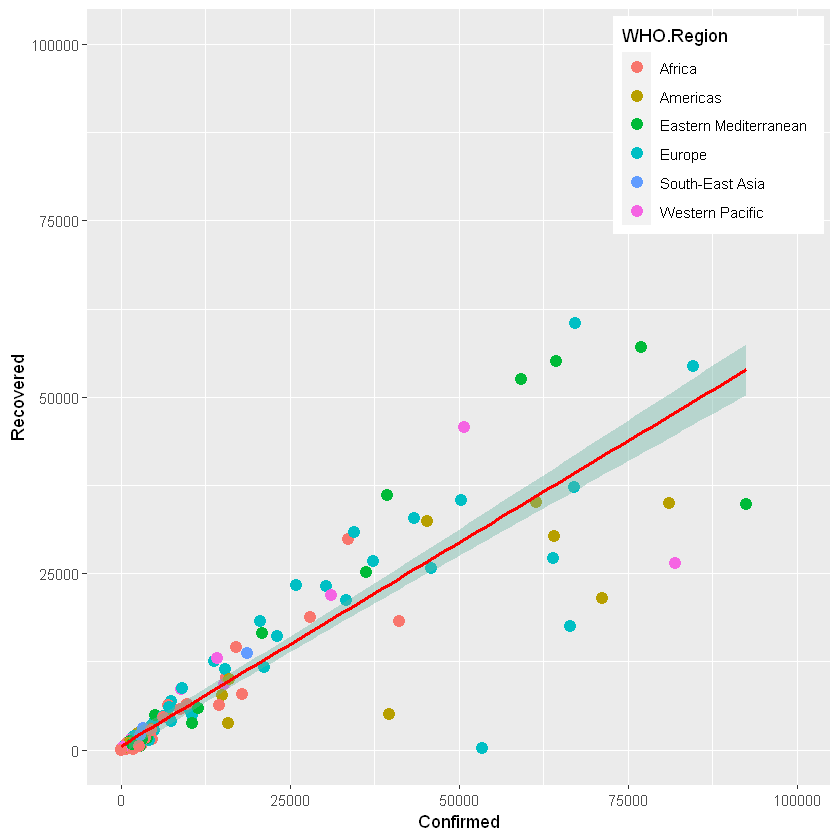

In [61]:
png(filename = "img/Scatter_confirmed_vs_recovered.png", units="in", width=5, height=5, res=300)

ggplot(df, aes(x=Confirmed, y=Recovered, color=WHO.Region)) + 
    geom_point(size=3) +
    geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
    xlim(0,100000) +
    ylim(0,100000) +
    theme(legend.position = c(0.8, 0.8))

dev.off()


ggplot(df, aes(x=Confirmed, y=Recovered, color=WHO.Region)) + 
    geom_point(size=3) +
    geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
    xlim(0,100000) +
    ylim(0,100000) +
    theme(legend.position = c(0.85, 0.85))


png 
  2

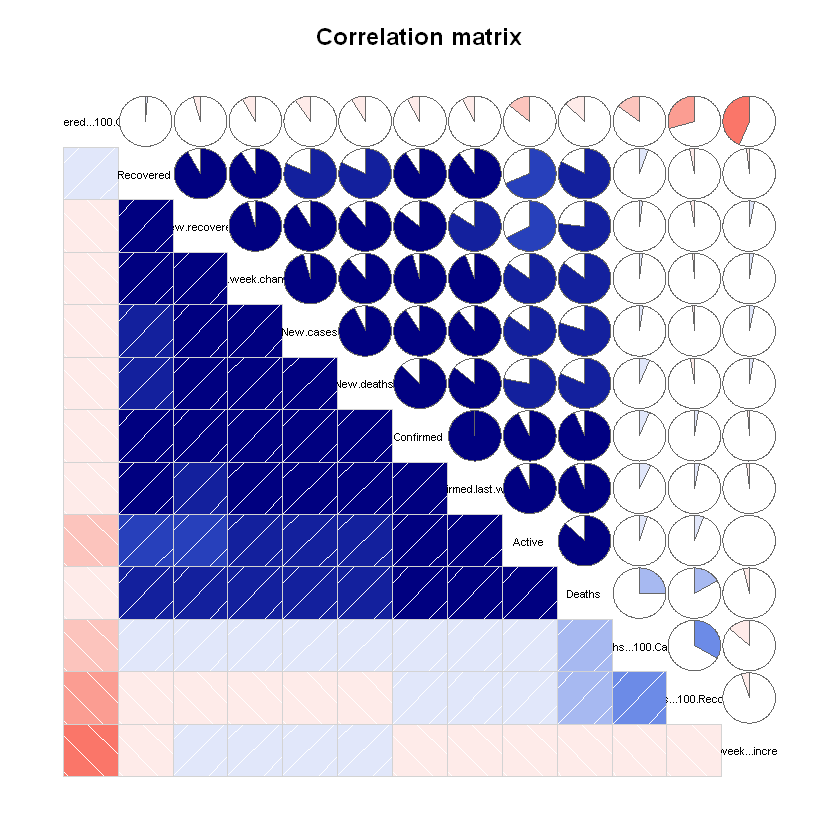

In [62]:
df_num = df[2:14]


# First
corrgram(df_num, order=TRUE, lower.panel=panel.shade, upper.panel=panel.pie, text.panel=panel.txt, main="Correlation matrix") 

png(filename = "img/Correlation_matrix.png", units="in", width=5, height=5, res=300)

corrgram(df_num, order=TRUE, lower.panel=panel.shade, upper.panel=panel.pie, text.panel=panel.txt, main="Correlation matrix") 

dev.off()


## Dimensionality reduction

In [63]:
str(df)

'data.frame':	182 obs. of  15 variables:
 $ Country.Region        : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed             : int  36263 4880 27973 907 950 86 167416 37390 15303 20558 ...
 $ Deaths                : int  1269 144 1163 52 41 3 3059 711 167 713 ...
 $ Recovered             : int  25198 2745 18837 803 242 65 72575 26665 9311 18246 ...
 $ Active                : int  9796 1991 7973 52 667 18 91782 10014 5825 1599 ...
 $ New.cases             : int  106 117 616 10 18 4 4890 73 368 86 ...
 $ New.deaths            : int  10 6 8 0 1 0 120 6 6 1 ...
 $ New.recovered         : int  18 63 749 0 0 5 2057 187 137 37 ...
 $ Deaths...100.Cases    : num  3.5 2.95 4.16 5.73 4.32 3.49 1.83 1.9 1.09 3.47 ...
 $ Recovered...100.Cases : num  69.5 56.2 67.3 88.5 25.5 ...
 $ Deaths...100.Recovered: num  5.04 5.25 6.17 6.48 16.94 ...
 $ Confirmed.last.week   : int  35526 4171 23691 884 749 76 130774 34981 12428 19743 ...
 $ X1.week.change        : int  737 709 4282 23 201

In [64]:
df_num = df[2:14]

df_scaled = scale(df_num)

corr_mat = cor(df_scaled)
eig = eigen(corr_mat)

PVE = eig$values/sum(eig$values)
PVE

cumsum(PVE)

[1]  6.169775e-01  1.232661e-01  1.046856e-01  5.104831e-02  3.798639e-02
 [6]  3.195261e-02  1.993903e-02  8.878492e-03  3.616068e-03  1.300972e-03
[11]  3.489565e-04 -7.639434e-18 -2.459900e-17

[1] 0.6169775 0.7402436 0.8449292 0.8959775 0.9339639 0.9659165 0.9858555
 [8] 0.9947340 0.9983501 0.9996510 1.0000000 1.0000000 1.0000000

In [65]:
df_pca = prcomp(df_scaled)

# compute total variance
variance = df_pca$sdev^2 / sum(df_pca$sdev^2)

# Scree plot
qplot(c(1:12), variance) +
  geom_line() +
  geom_point(size=4)+
  xlab("Principal Component") +
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."
ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (13)
✖ Fix the following mappings: `x`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 . 

In [66]:
# compute total variance
cum_variance = cumsum(variance)

# Scree plot
qplot(c(1:12), cum_variance) +
  geom_line() +
  geom_point(size=4)+
  xlab("Principal Component") +
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (13)
✖ Fix the following mappings: `x`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr

In [67]:
# Kaiser rule
kaiser = df_pca$sdev^2
print(kaiser)

which(kaiser>1)

 [1] 8.020707e+00 1.602460e+00 1.360913e+00 6.636280e-01 4.938230e-01
 [6] 4.153839e-01 2.592074e-01 1.154204e-01 4.700889e-02 1.691263e-02
[11] 4.536435e-03 2.061963e-31 1.867706e-33


[1] 1 2 3

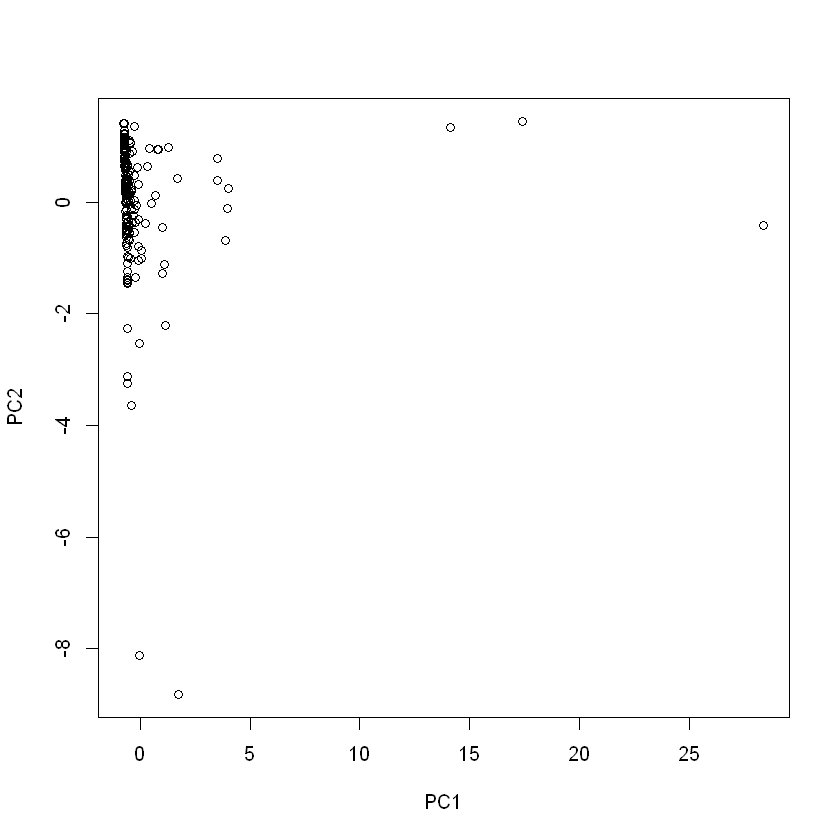

png 
  2

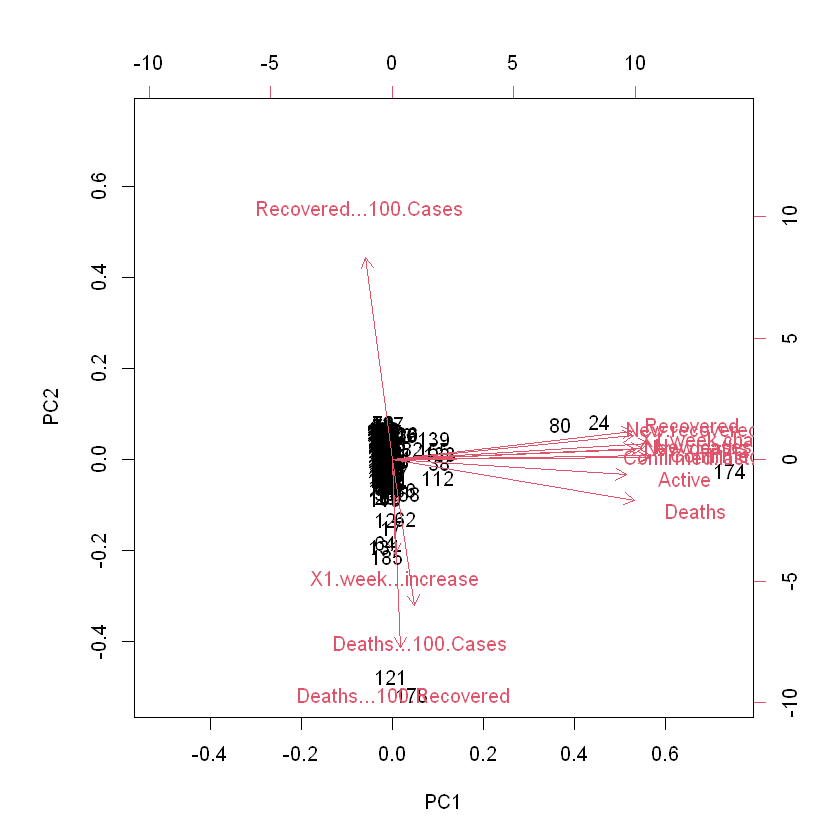

In [68]:
#str(df_pca)

pca_scores = data.frame(df_pca$x[,1:2])
plot(pca_scores)

biplot(df_pca)

png(filename = "img/Biplot.png", units="in", width=5, height=5, res=300)

biplot(df_pca)

dev.off()

## Predictive Analysis

### Clustering

In [69]:
set.seed(1)
hopkins(df_scaled) # Calculated values 0-0.3 indicate regularly-spaced data. Values around 0.5 indicate random data. Values 0.7-1 indicate clustered data.


[1] 1

In [70]:
k = 6
fit_kmeans <- kmeans(df_scaled, k)

In [71]:
table(df$WHO.Region, fit_kmeans$cluster)

                       
                         1  2  3  4  5  6
  Africa                 1 23 22  0  1  0
  Americas               1 14 14  2  3  0
  Eastern Mediterranean  0 13  6  0  2  0
  Europe                 0 33 13  0  6  2
  South-East Asia        0  6  3  1  0  0
  Western Pacific        1 12  3  0  0  0

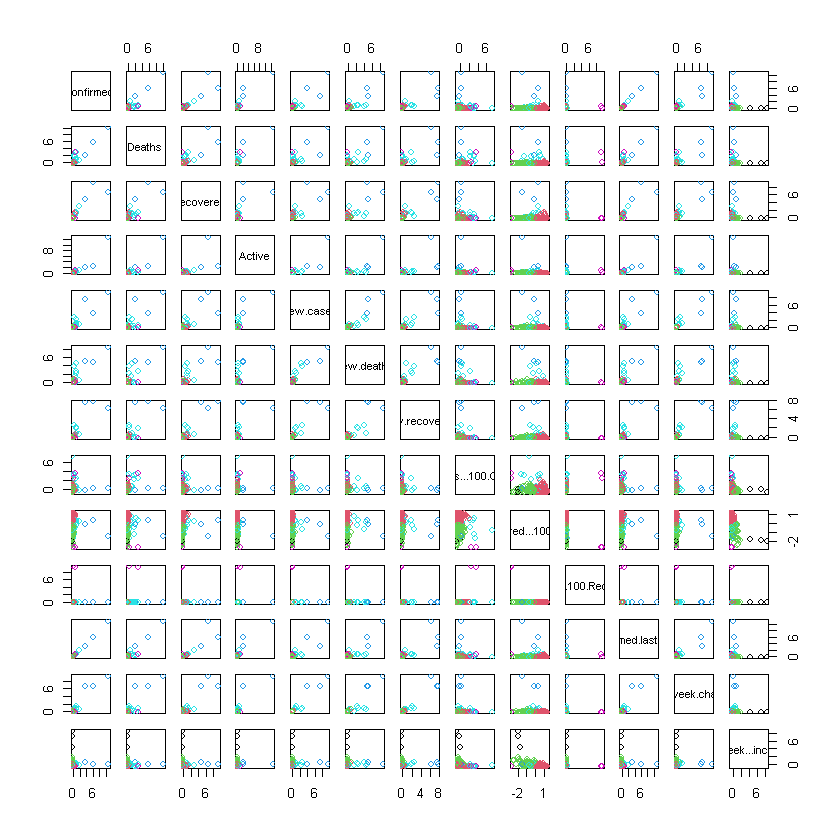

In [72]:
pairs(df_scaled, col=c(1:k)[fit_kmeans$cluster])

### Linear regression

In [73]:
lm(formula = Deaths ~ Confirmed + Recovered + Active + New.cases + New.deaths + 
                      New.recovered + Deaths...100.Cases + Recovered...100.Cases + 
                      Deaths...100.Recovered + Confirmed.last.week + X1.week.change +
                      X1.week...increase, data=df)


Call:
lm(formula = Deaths ~ Confirmed + Recovered + Active + New.cases + 
    New.deaths + New.recovered + Deaths...100.Cases + Recovered...100.Cases + 
    Deaths...100.Recovered + Confirmed.last.week + X1.week.change + 
    X1.week...increase, data = df)

Coefficients:
           (Intercept)               Confirmed               Recovered  
             3.452e-11               1.000e+00              -1.000e+00  
                Active               New.cases              New.deaths  
            -1.000e+00              -5.663e-15              -4.424e-14  
         New.recovered      Deaths...100.Cases   Recovered...100.Cases  
             1.051e-15               7.179e-13              -1.770e-13  
Deaths...100.Recovered     Confirmed.last.week          X1.week.change  
            -5.731e-15              -9.233e-16                      NA  
    X1.week...increase  
             5.668e-14  
